# AIN212 Project

Metehan Sarıkaya
21993049

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
url = 'https://drive.google.com/file/d/1SVnVxbJ03fUEa7o61G4Gqa_8fyaghT5p/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [4]:
df = pd.read_csv(url, sep=";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<AxesSubplot:xlabel='age', ylabel='Count'>

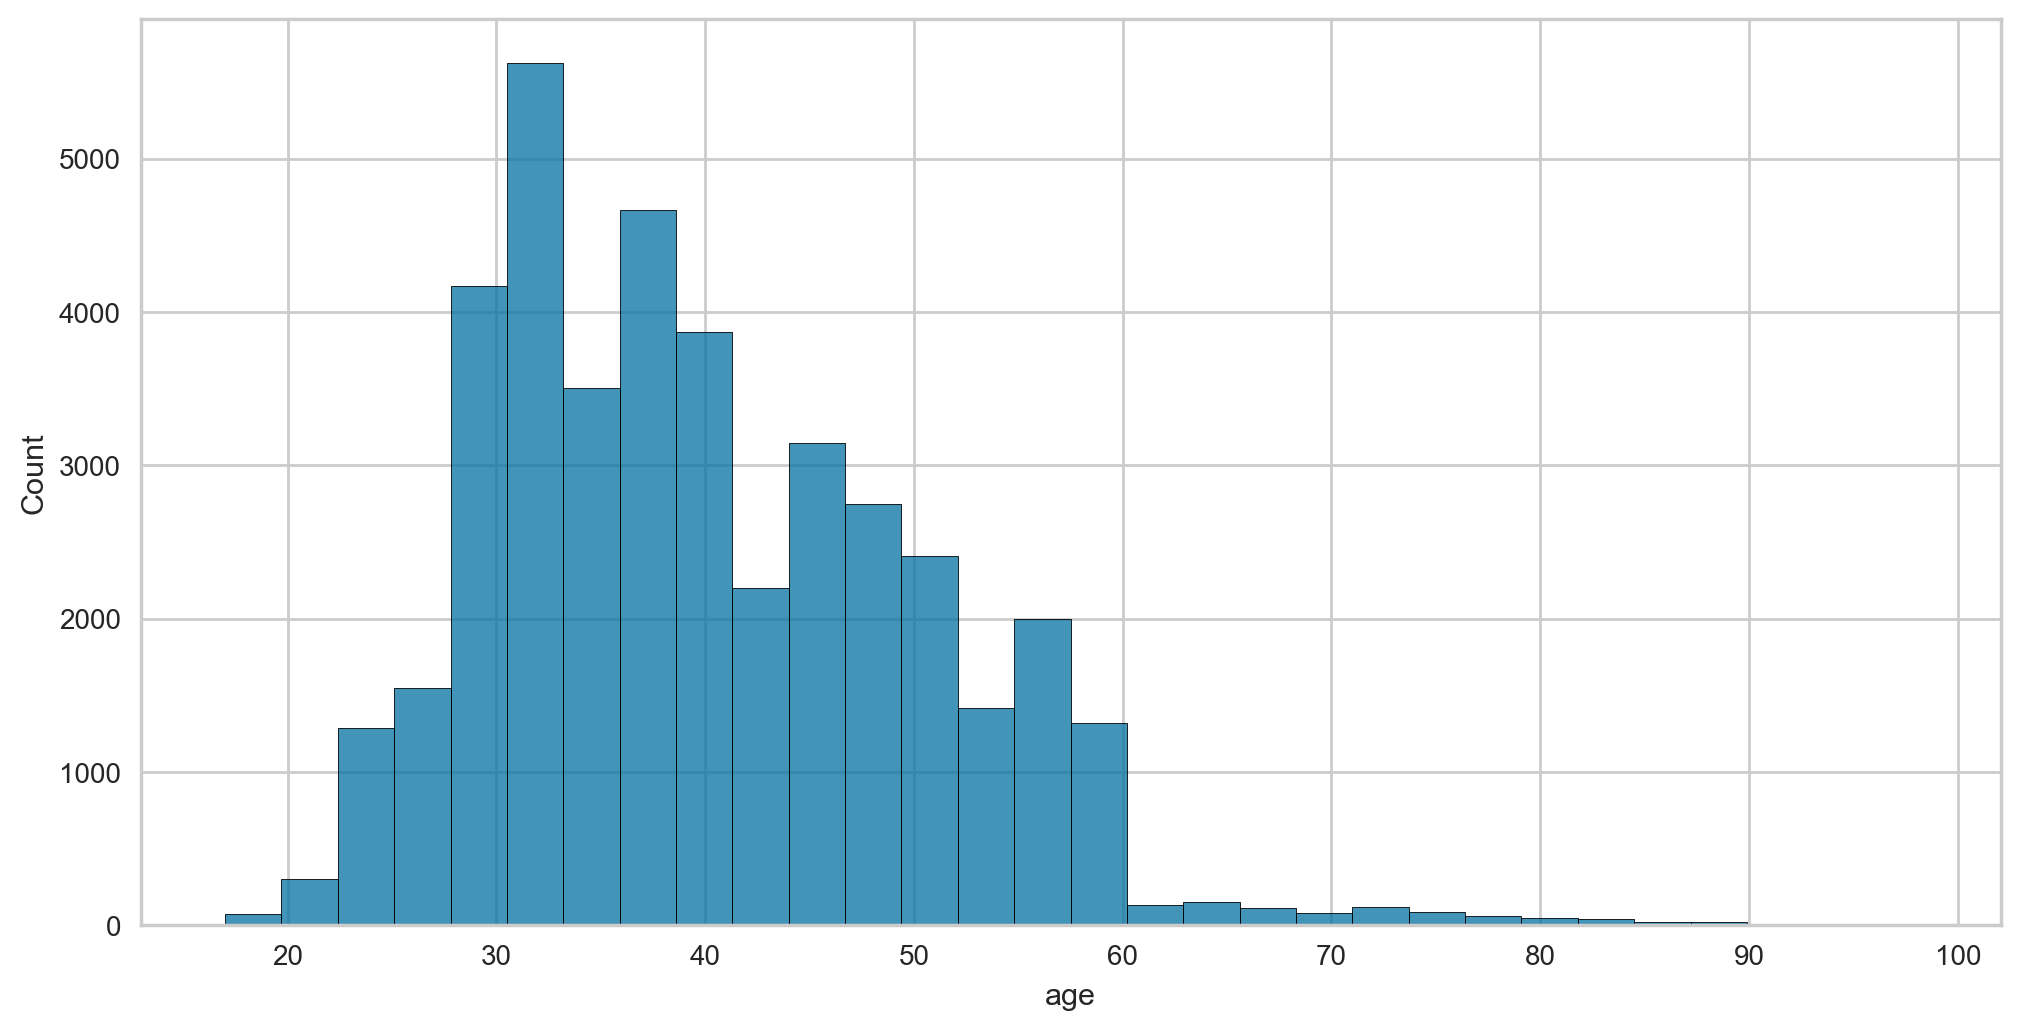

In [8]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x = "age", bins = 30)

age (numeric). Minimum age is 17.0 because this age is legal limit age for bank markating. Maximum age is 98. Client is mostly 30-40 years old. Mean is 40.

(0.0, 1750.0)

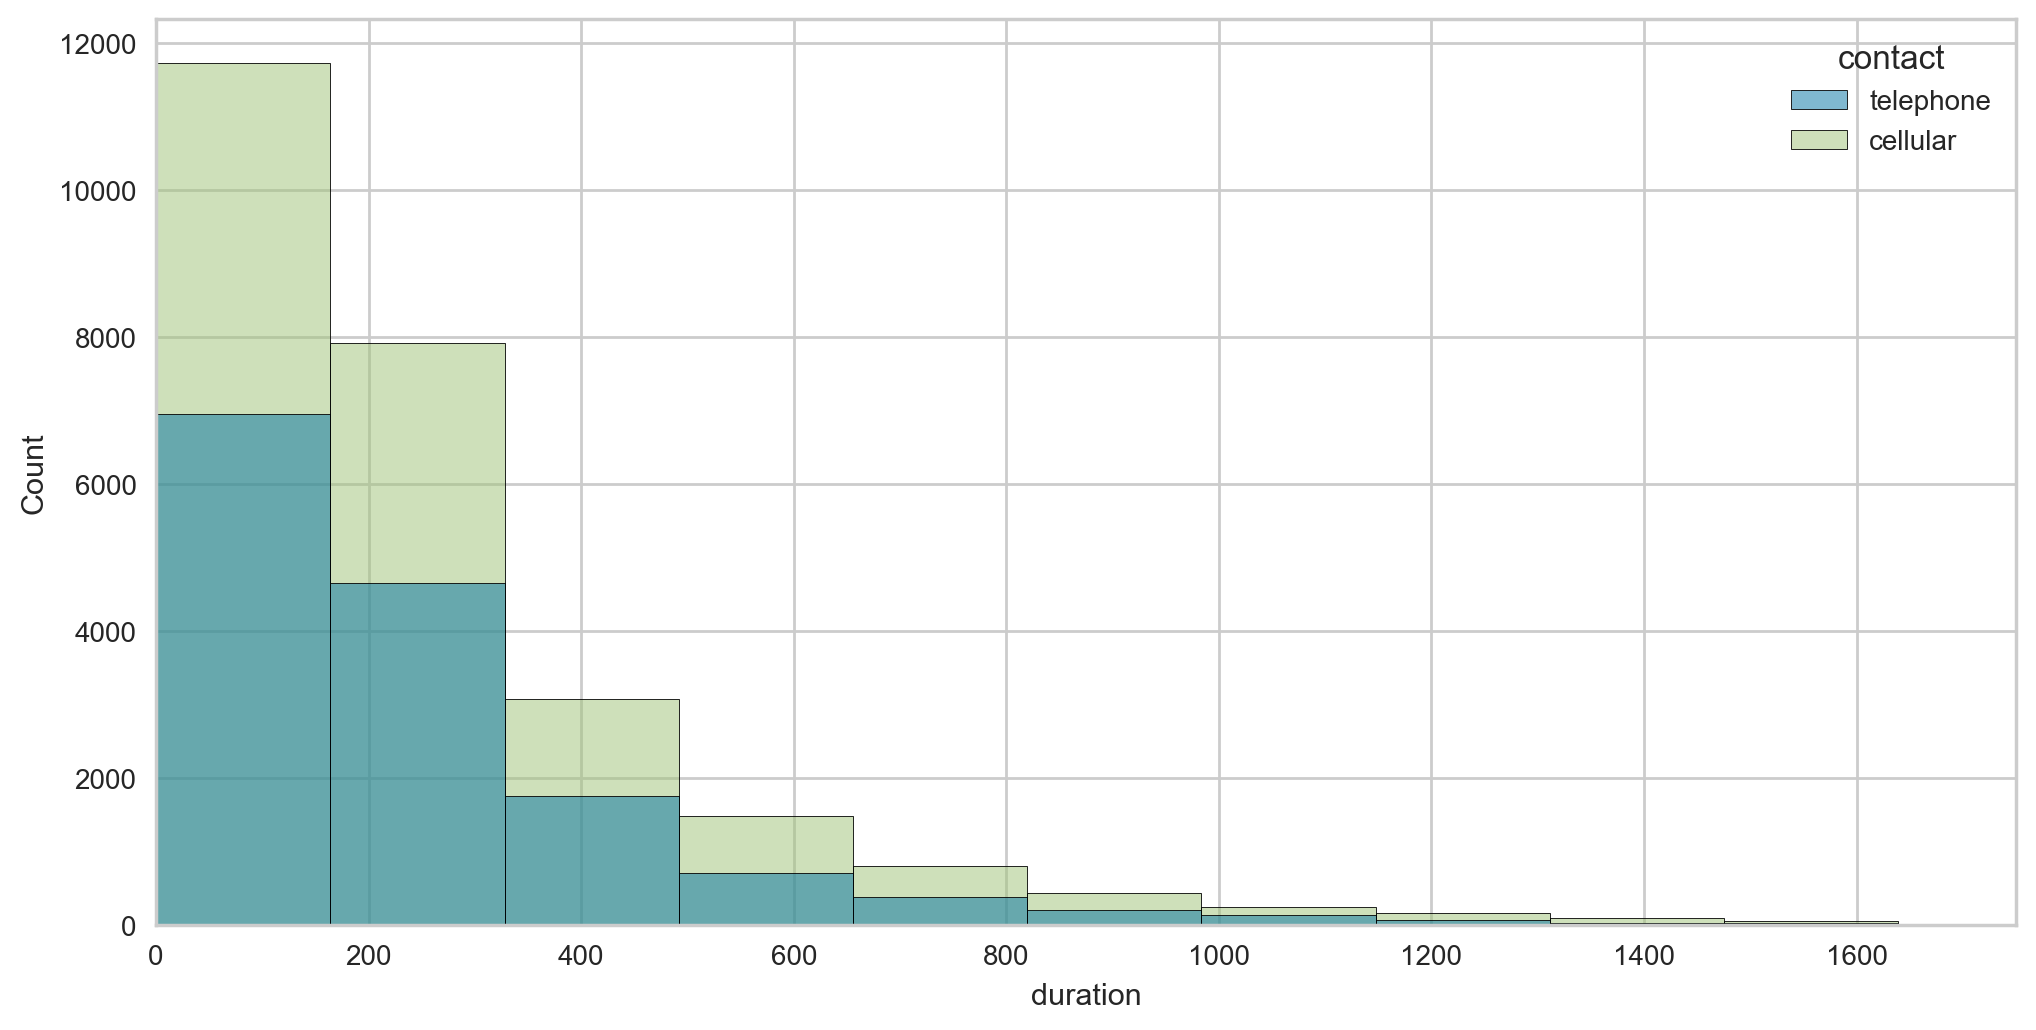

In [9]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x = "duration", bins=30, hue="contact")
plt.xlim(0,1750)

duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

As you can see most people talk between 0 and 15 minute and they mostly prefer cellular to telephone. As I understand from this graph information bank marketer should keep under 15 minute their contact with client and they should prefer cellular.

<AxesSubplot:xlabel='pdays', ylabel='Count'>

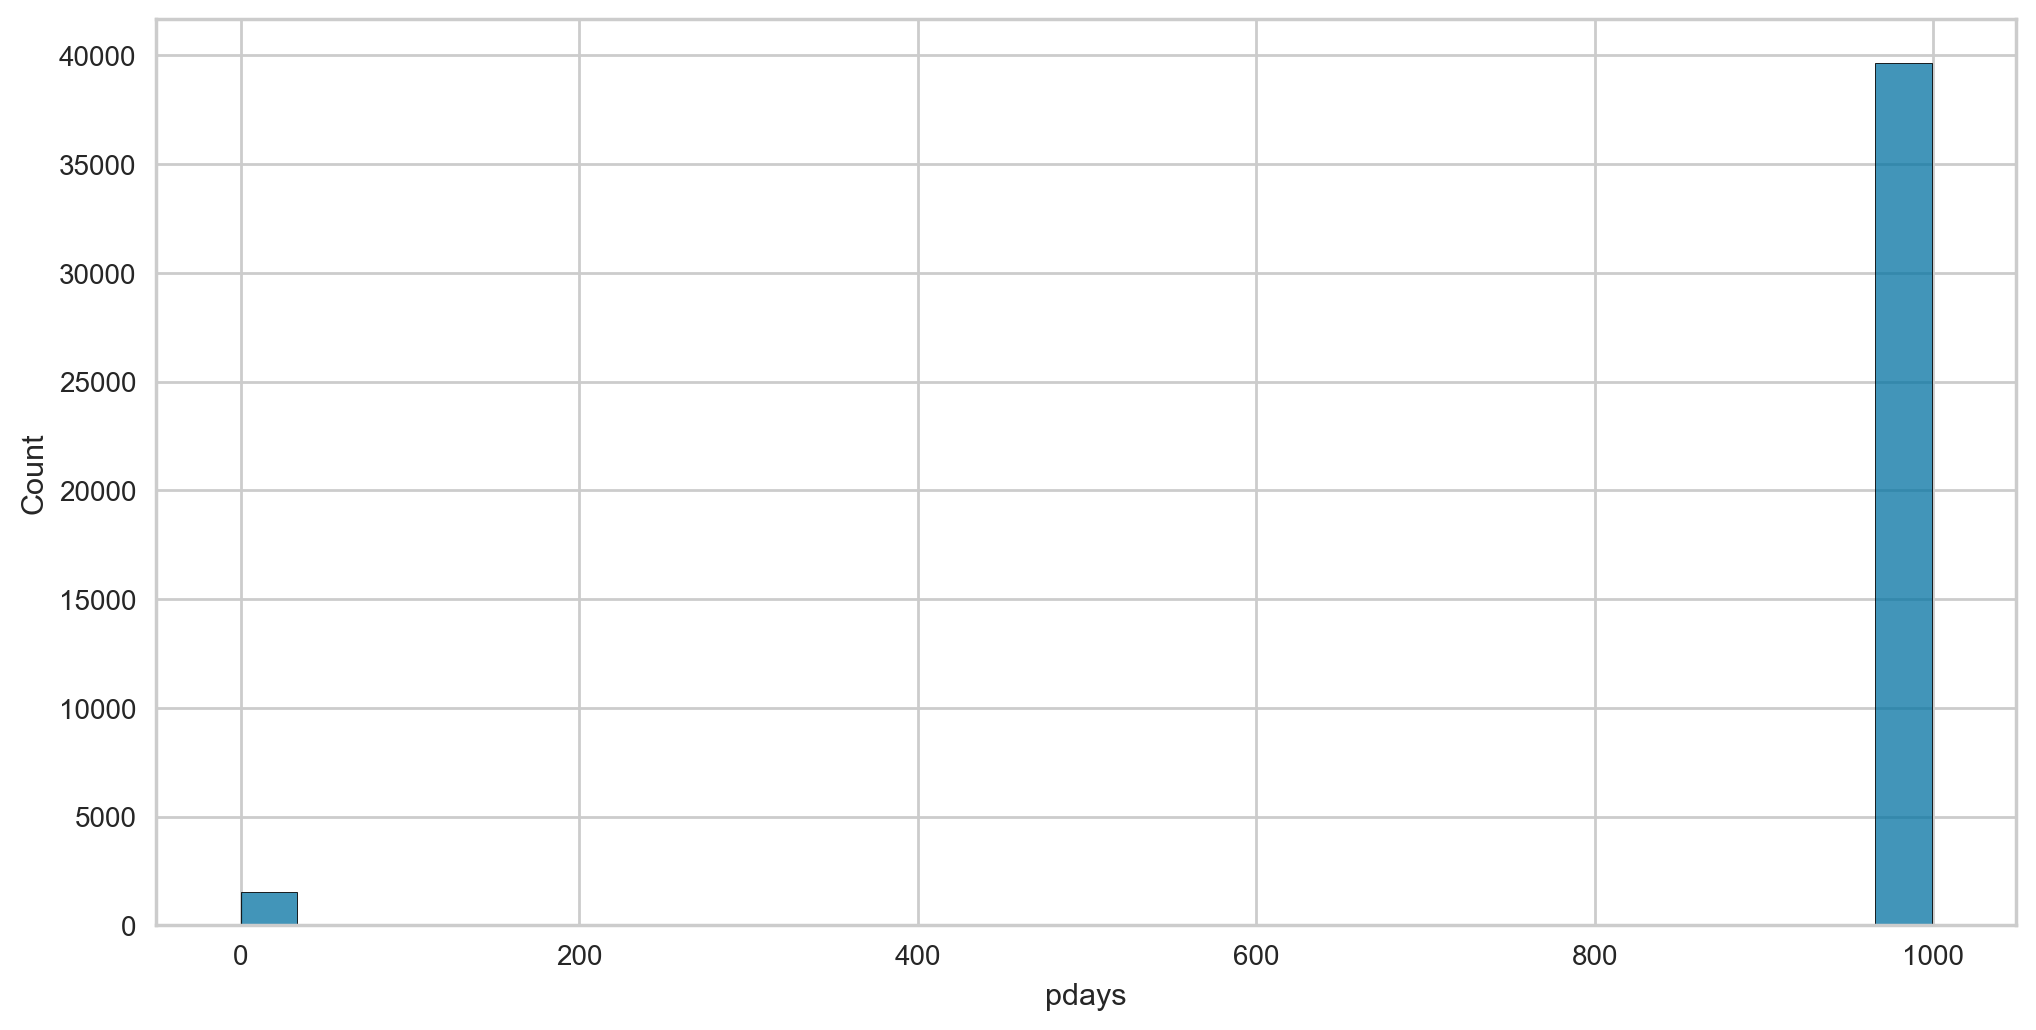

In [10]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x = "pdays", bins=30)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). Most of people have 999 as pdays that means they never contacted in previous campaign. So our dataset mostly about first contact of client with bank market.

<AxesSubplot:xlabel='pdays', ylabel='Count'>

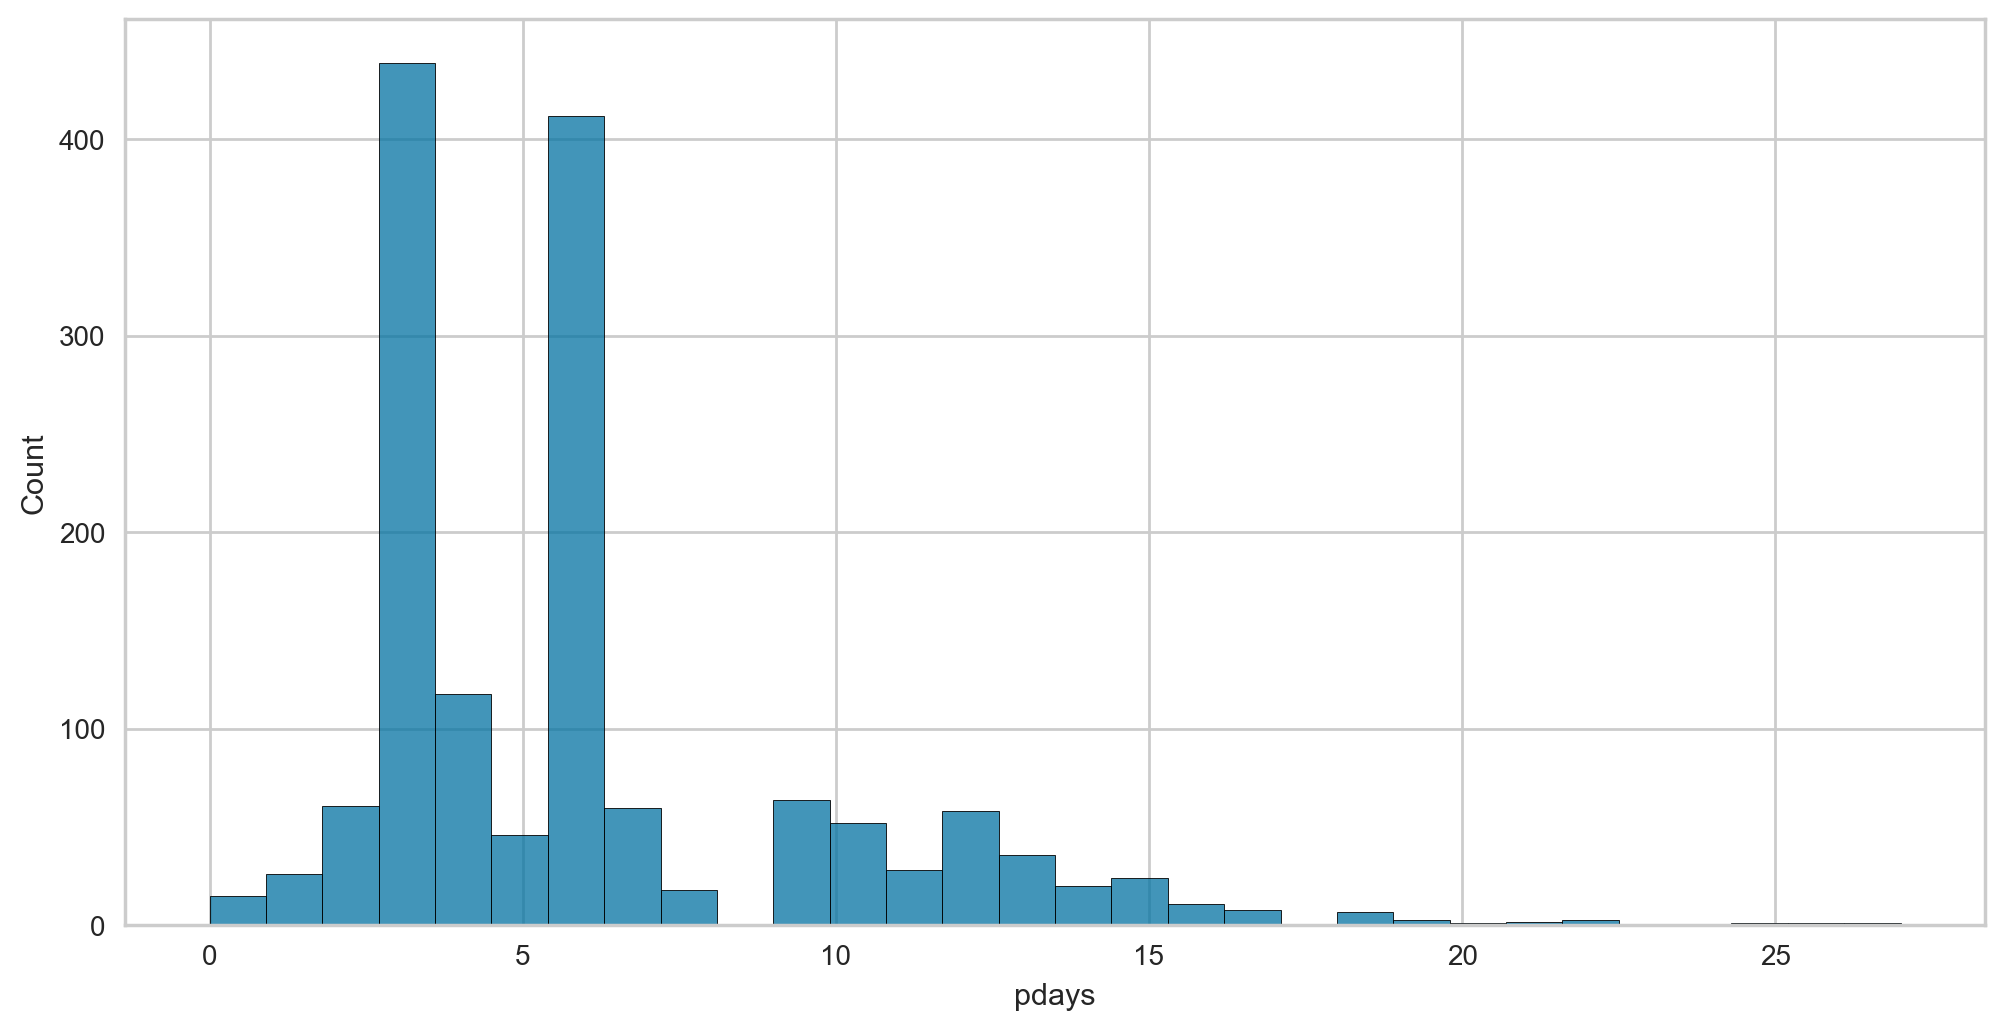

In [11]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df[df["pdays"] != 999], x = "pdays", bins=30)

In this graph I cleaned client who never contact before.

<AxesSubplot:xlabel='previous', ylabel='Count'>

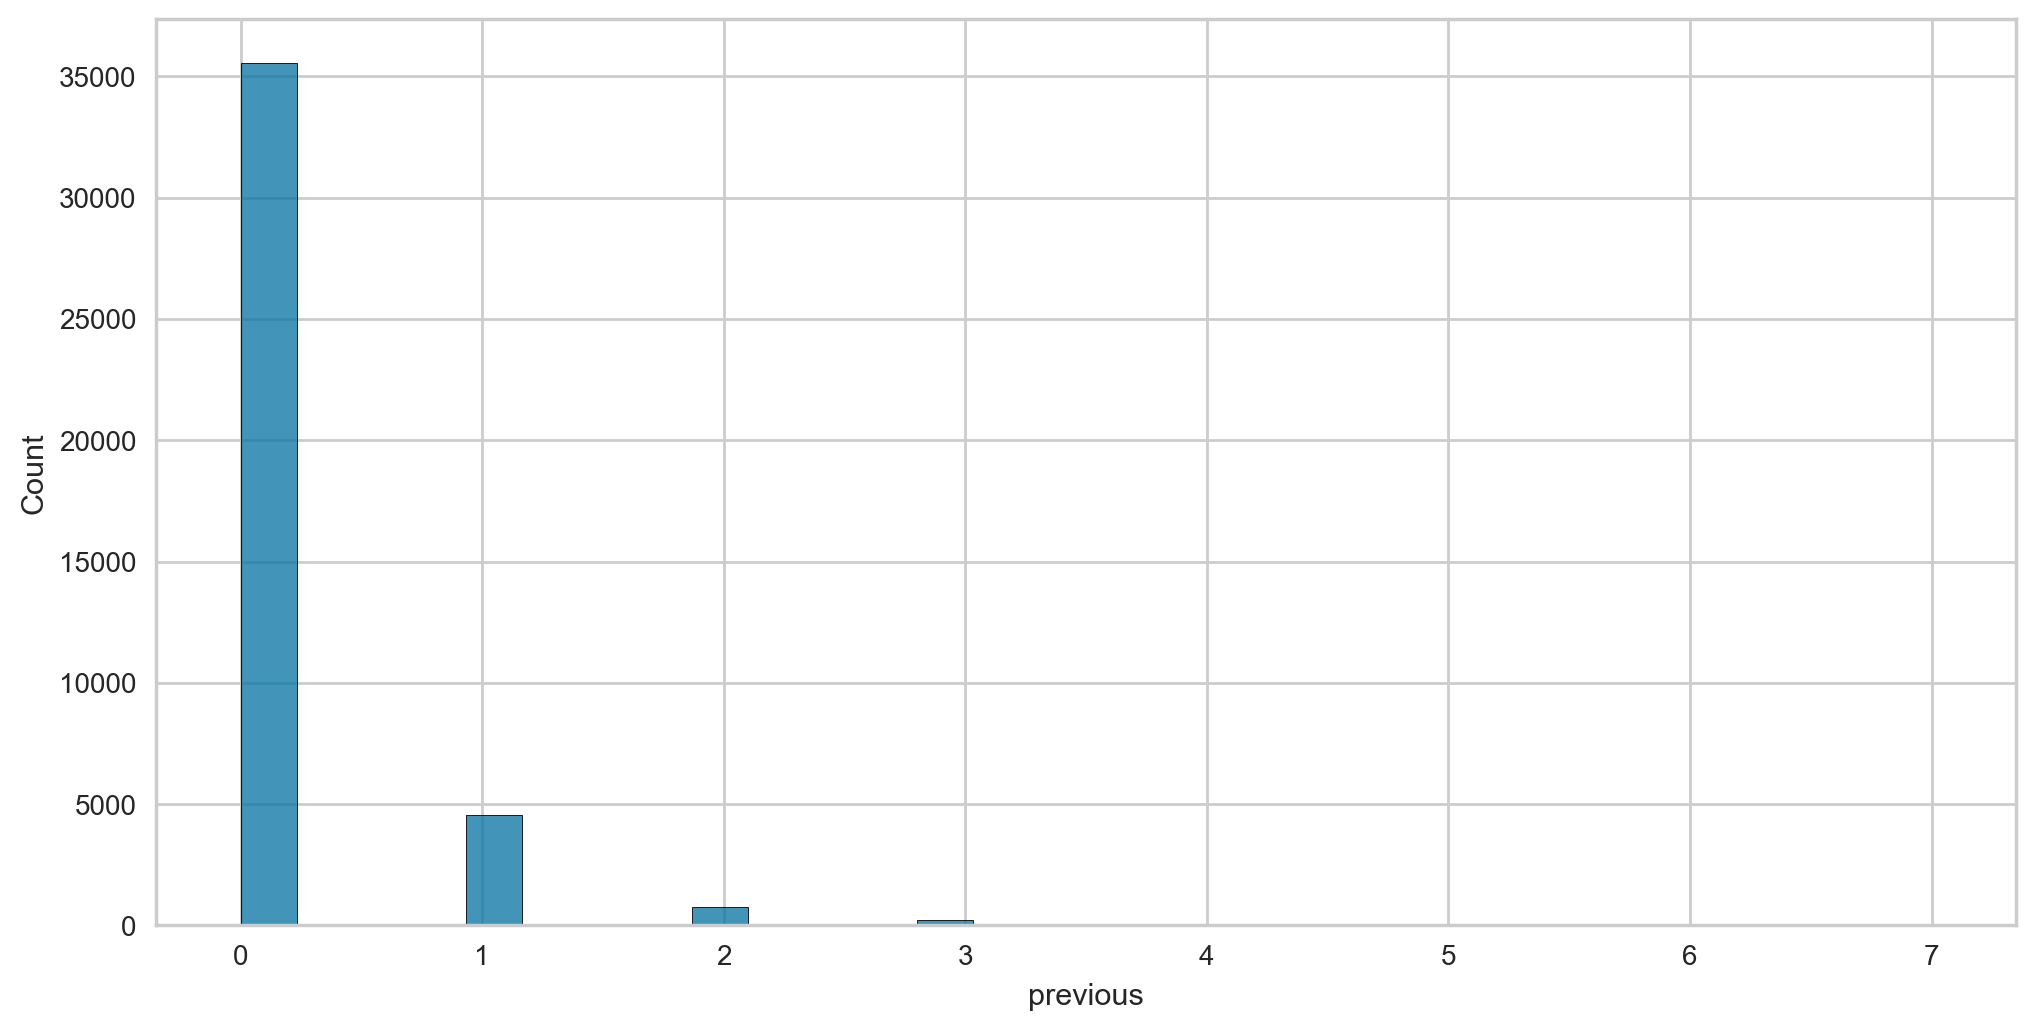

In [12]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x = "previous", bins=30)

I did parameter selection for logistic regression using grid search and for this i used the validation set. I used the validation set because I want to avoid overfitting. As you can see our model is giving best accurracy with 100 C values and l2 which is ridge norm as the norm used in normalization.

<AxesSubplot:xlabel='campaign', ylabel='Count'>

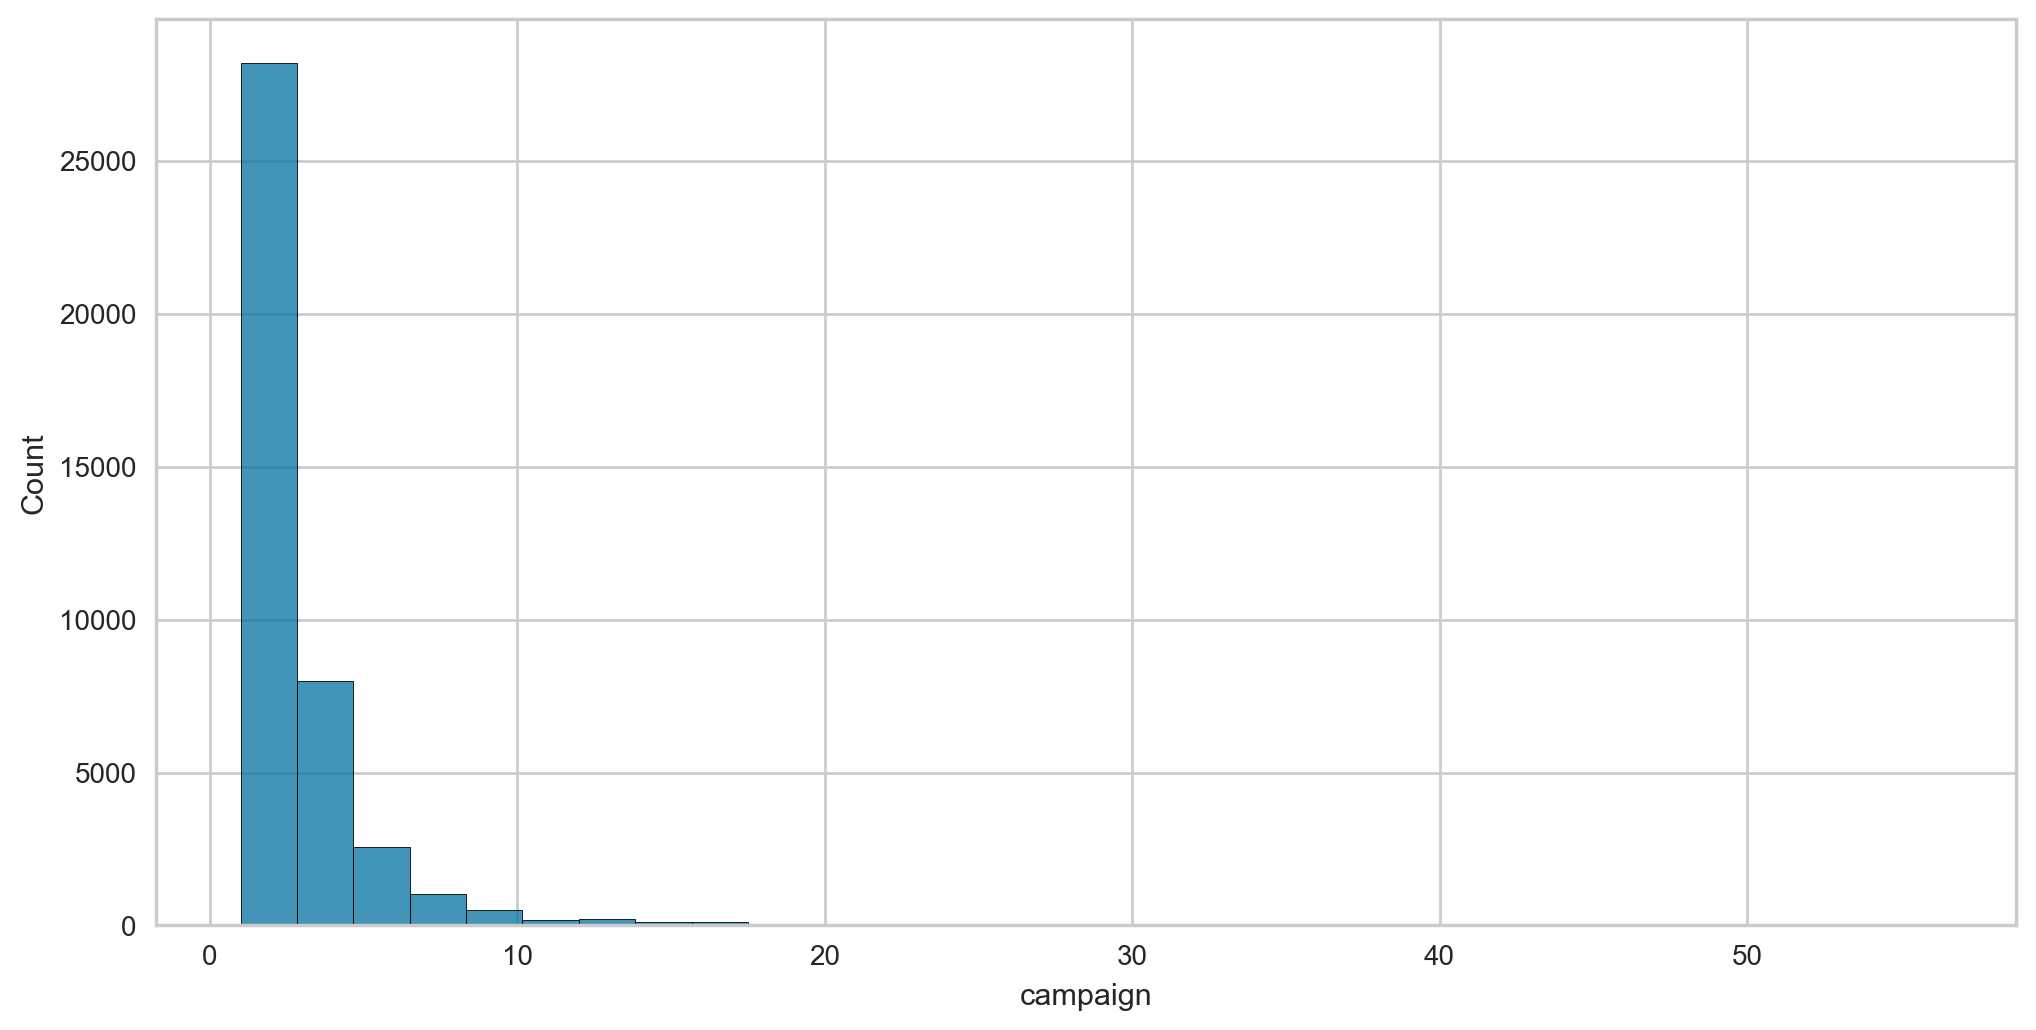

In [13]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data = df, x = "campaign", bins = 30)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

According to information in this graph client don't want contact with marketer more than 10 times.

In [14]:
def f(x):
    for i in x:
        plt.figure(figsize=(12,6), dpi = 200)
        sns.countplot(data = df, x= i, order = df[i].value_counts().index)
        plt.xticks(rotation = 90)
        plt.show()

In [15]:
catCol = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

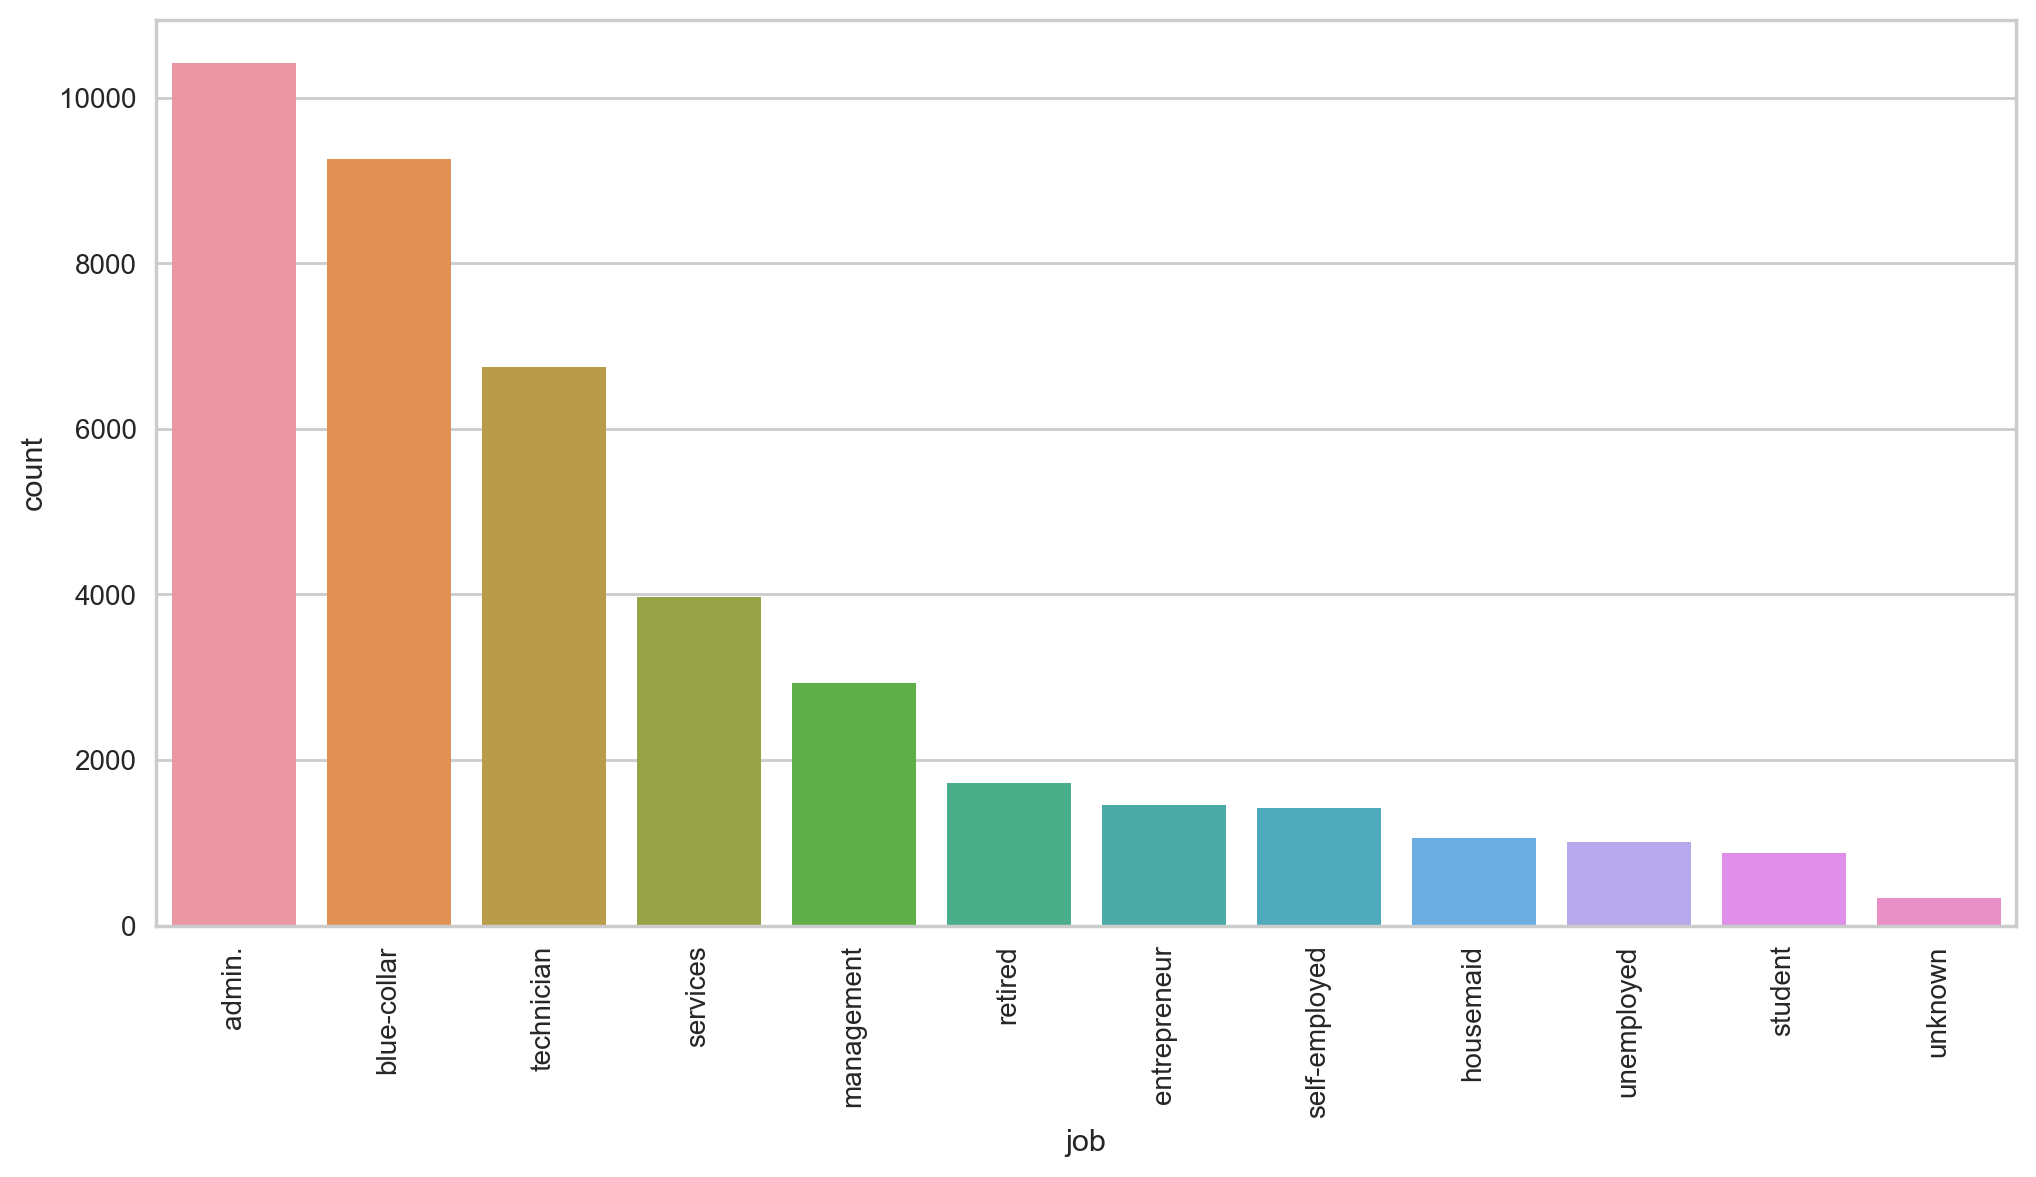

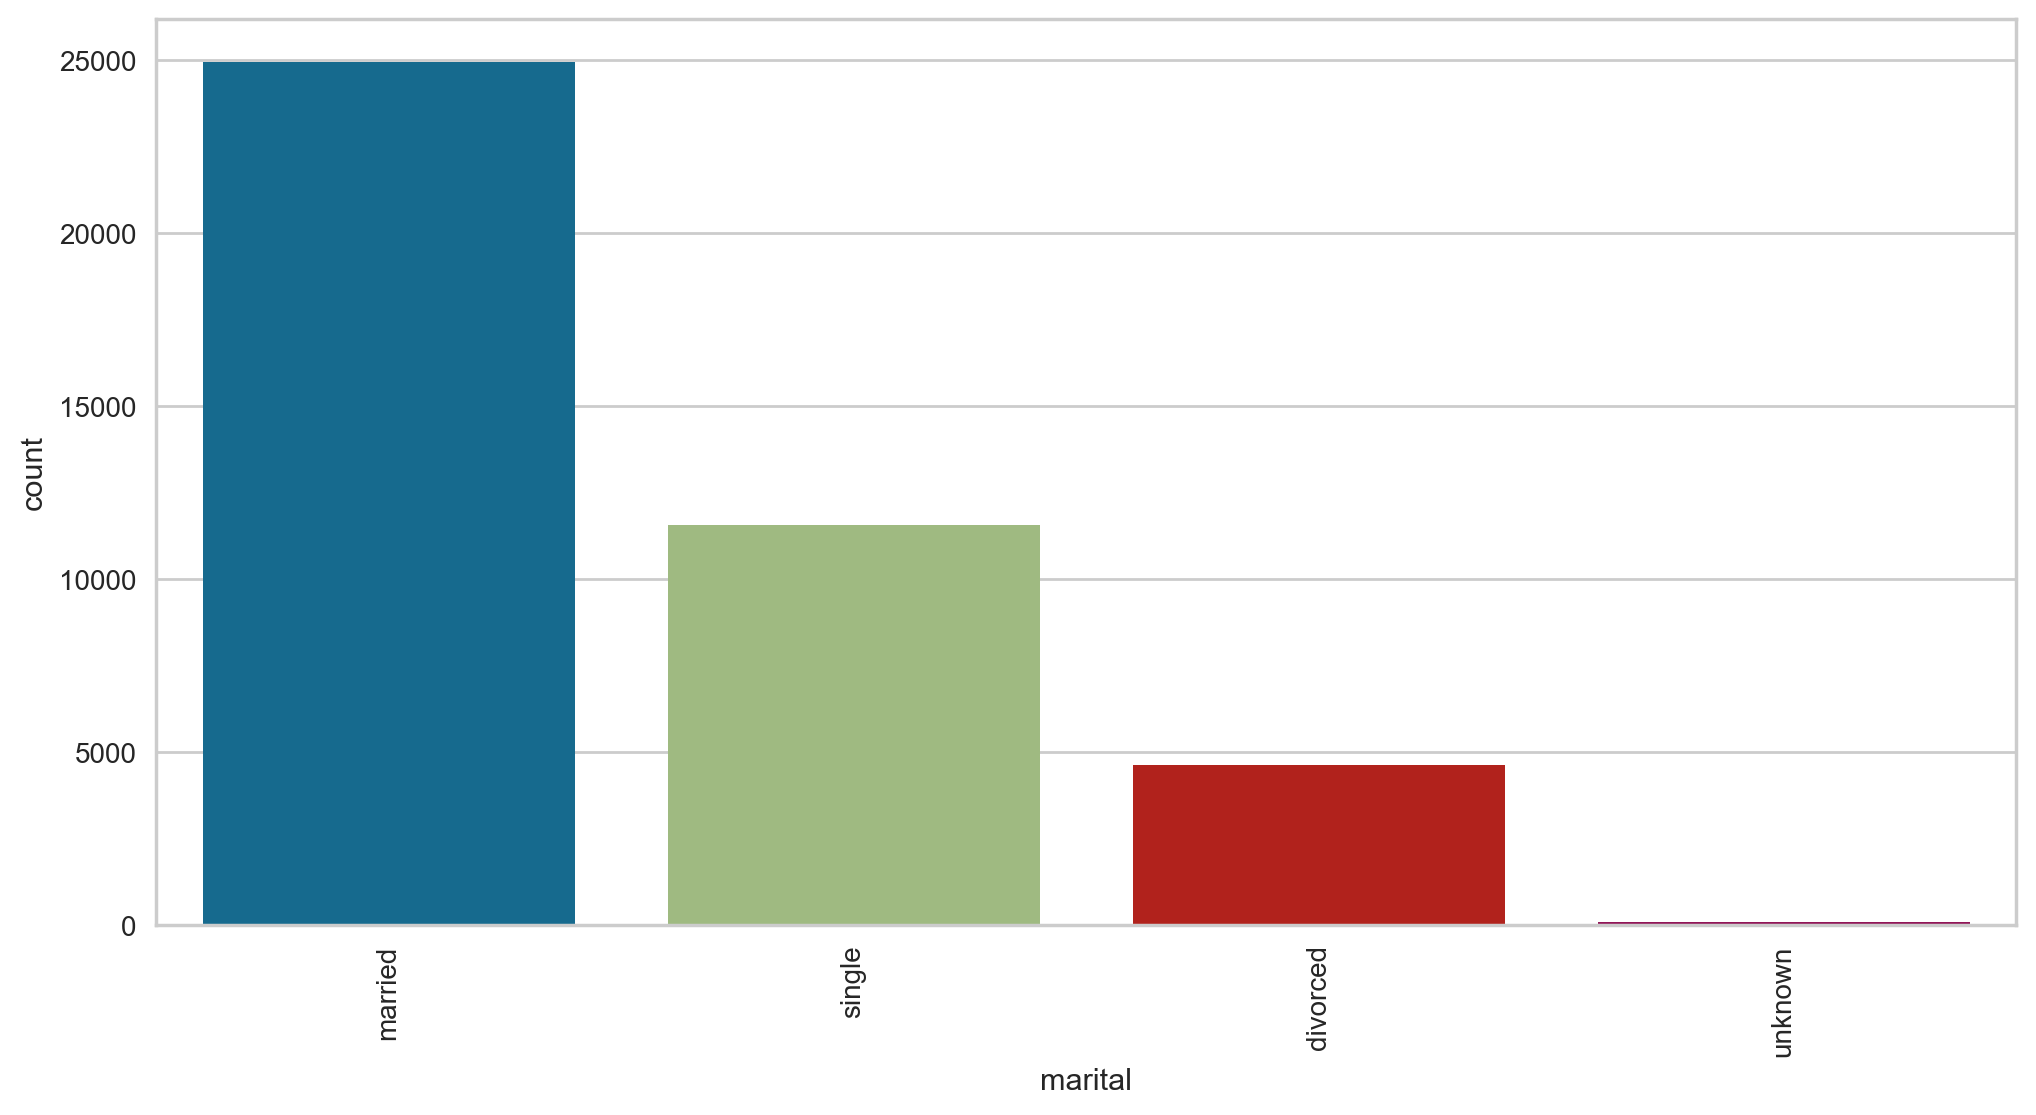

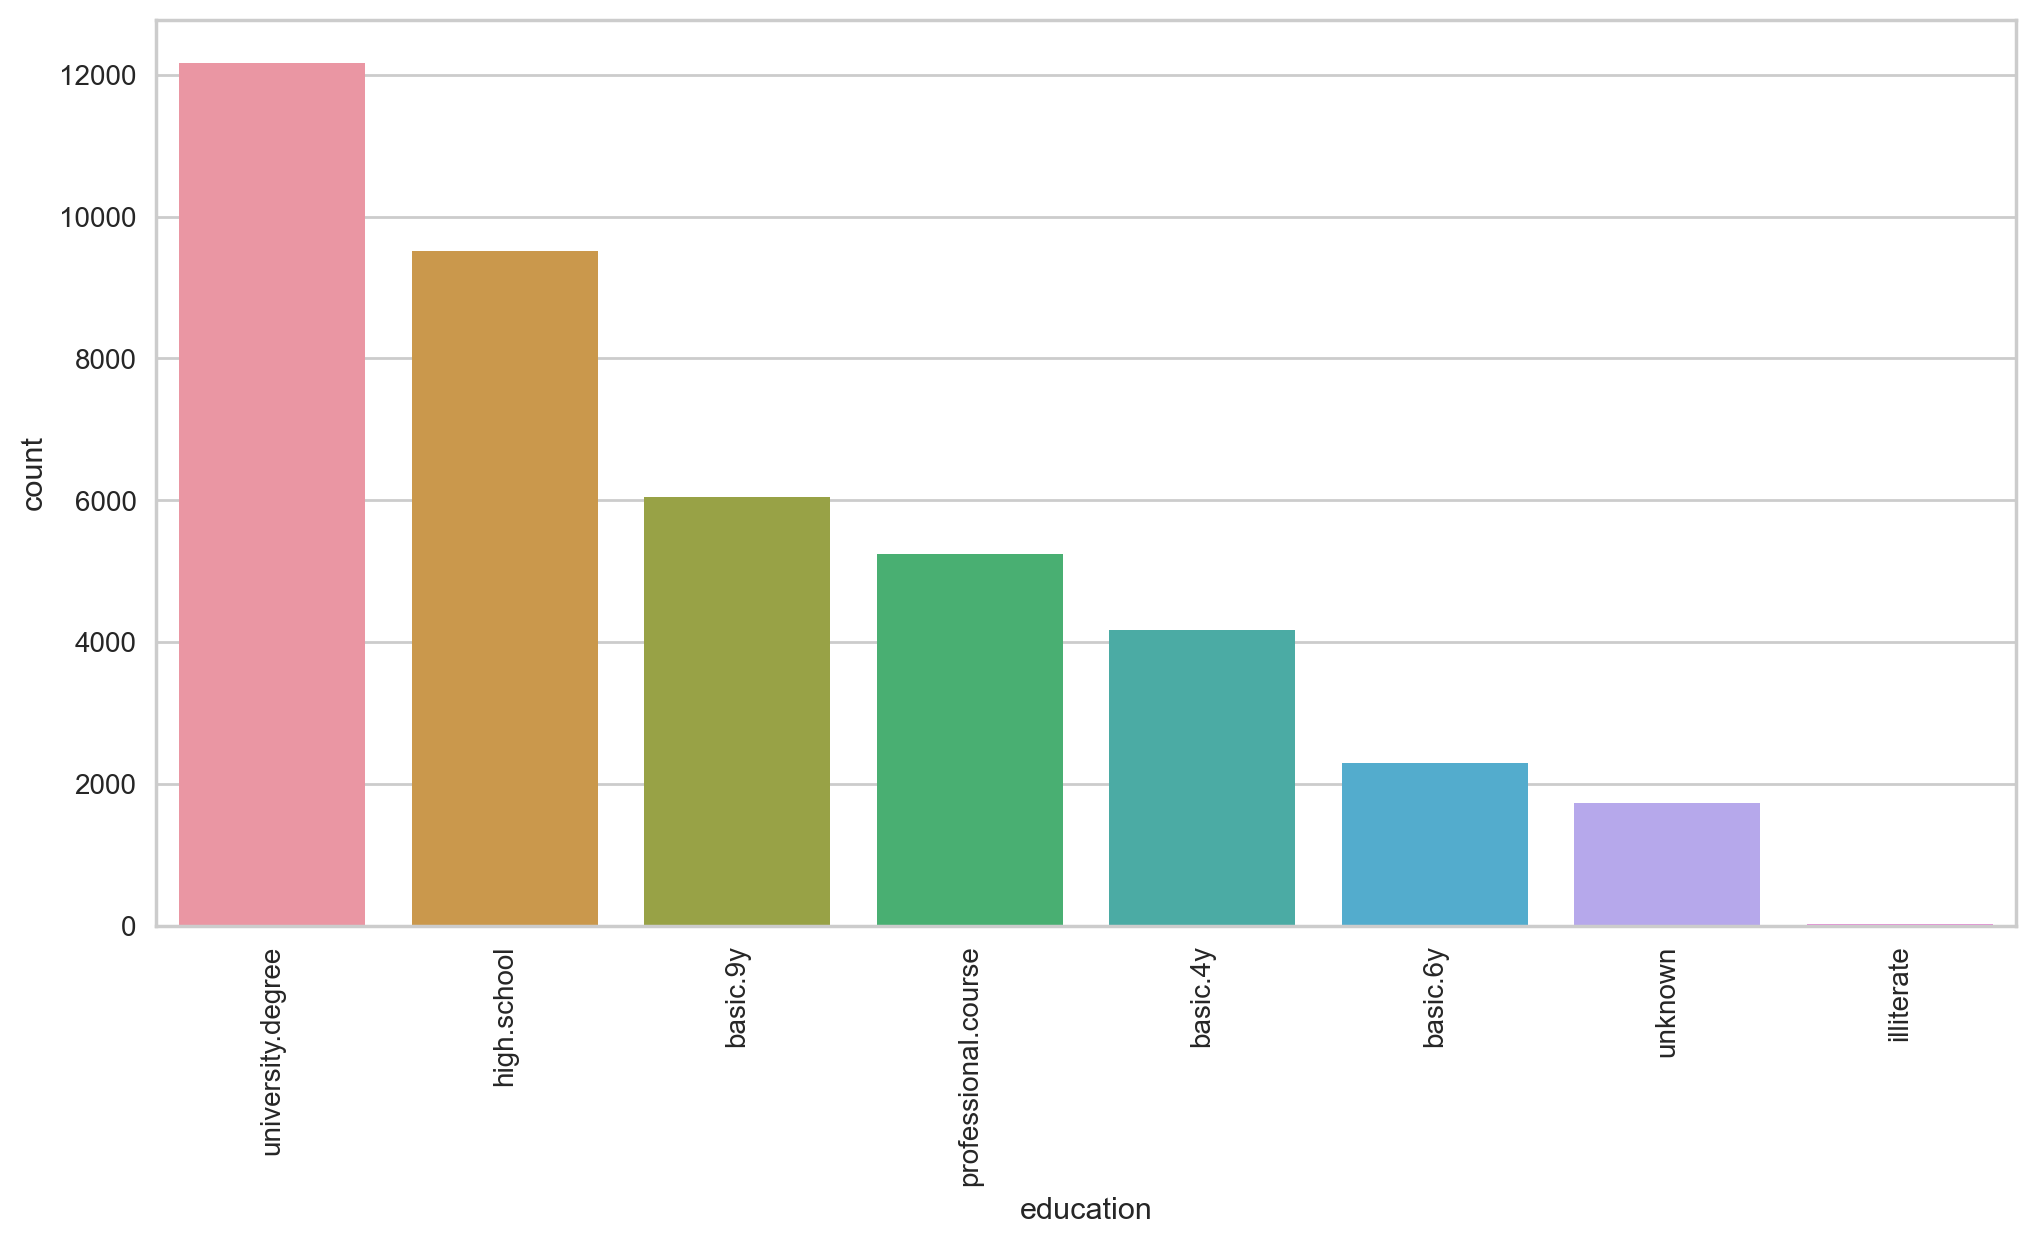

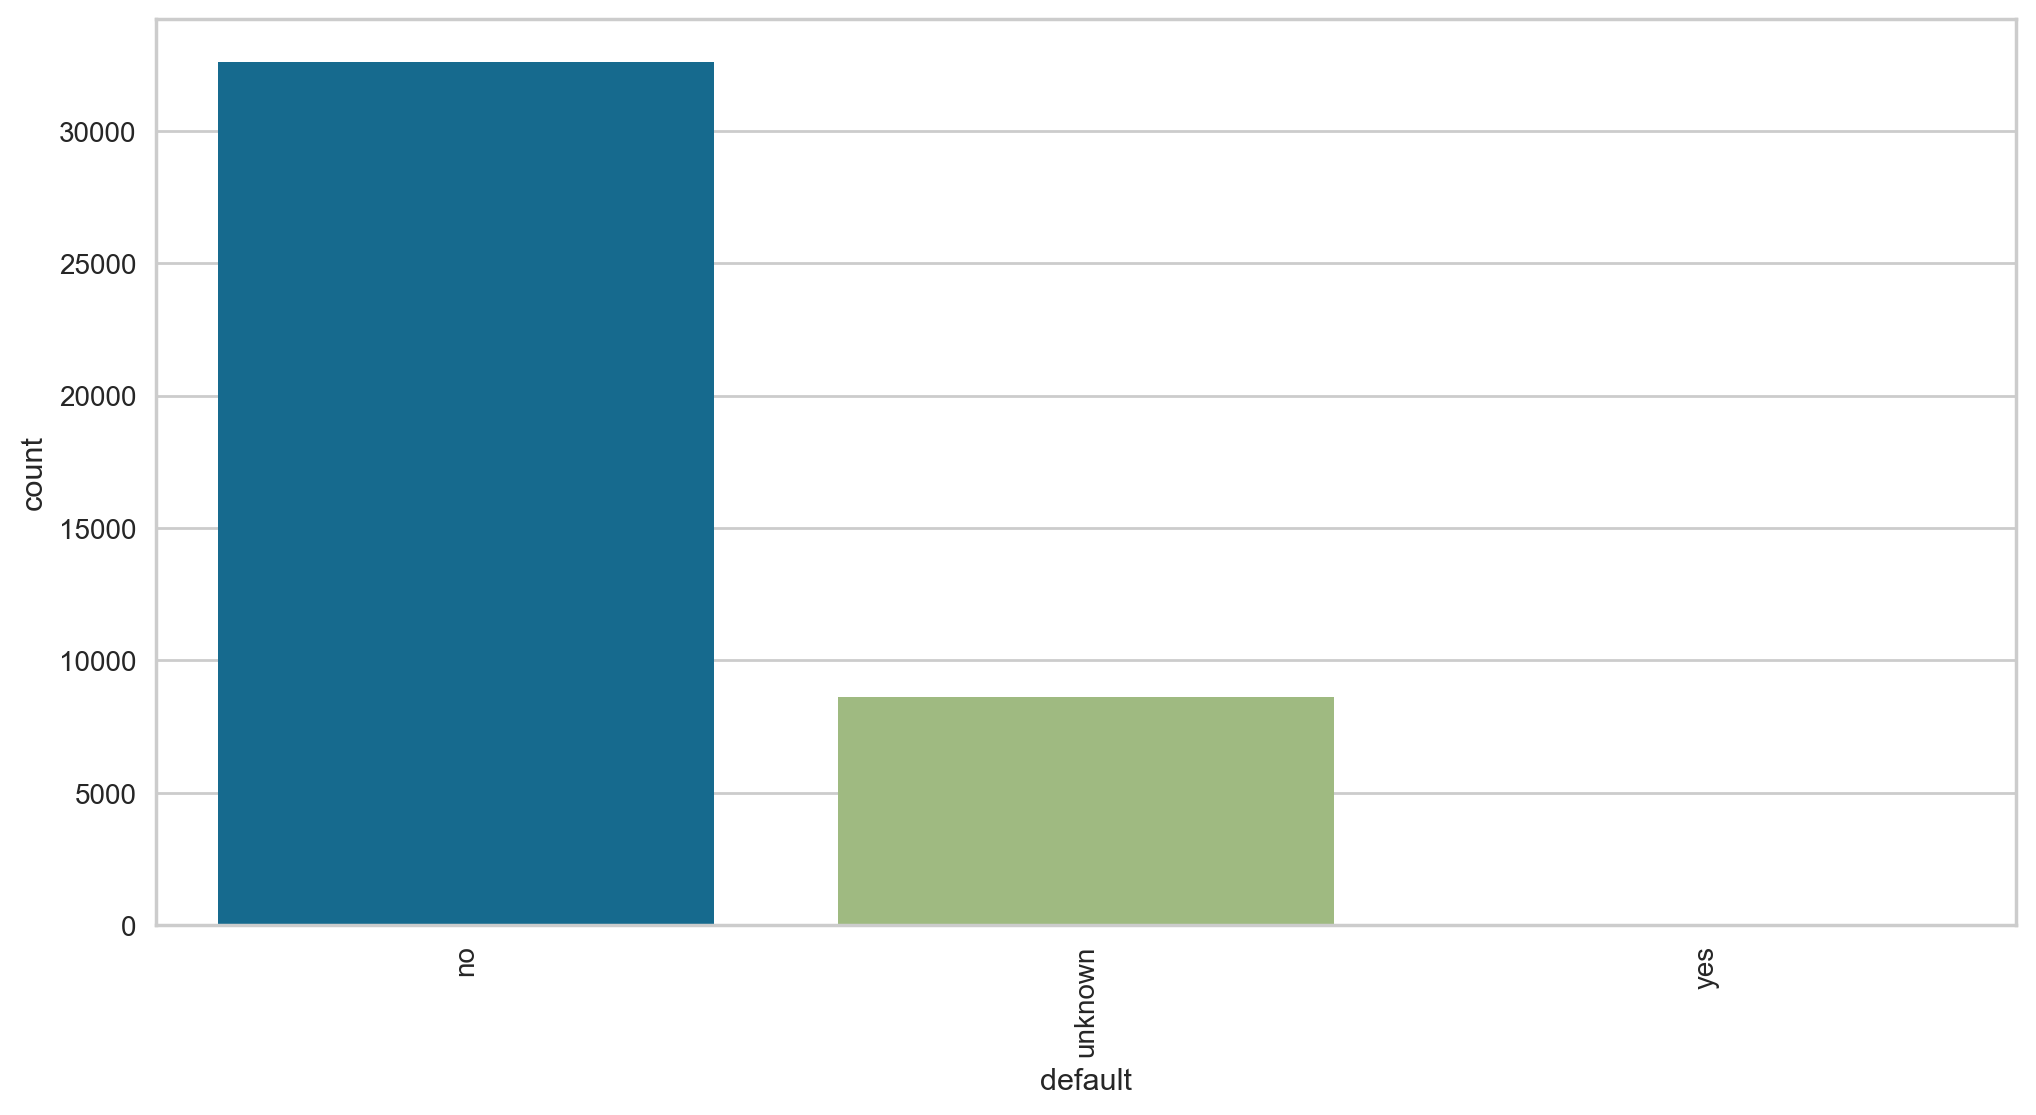

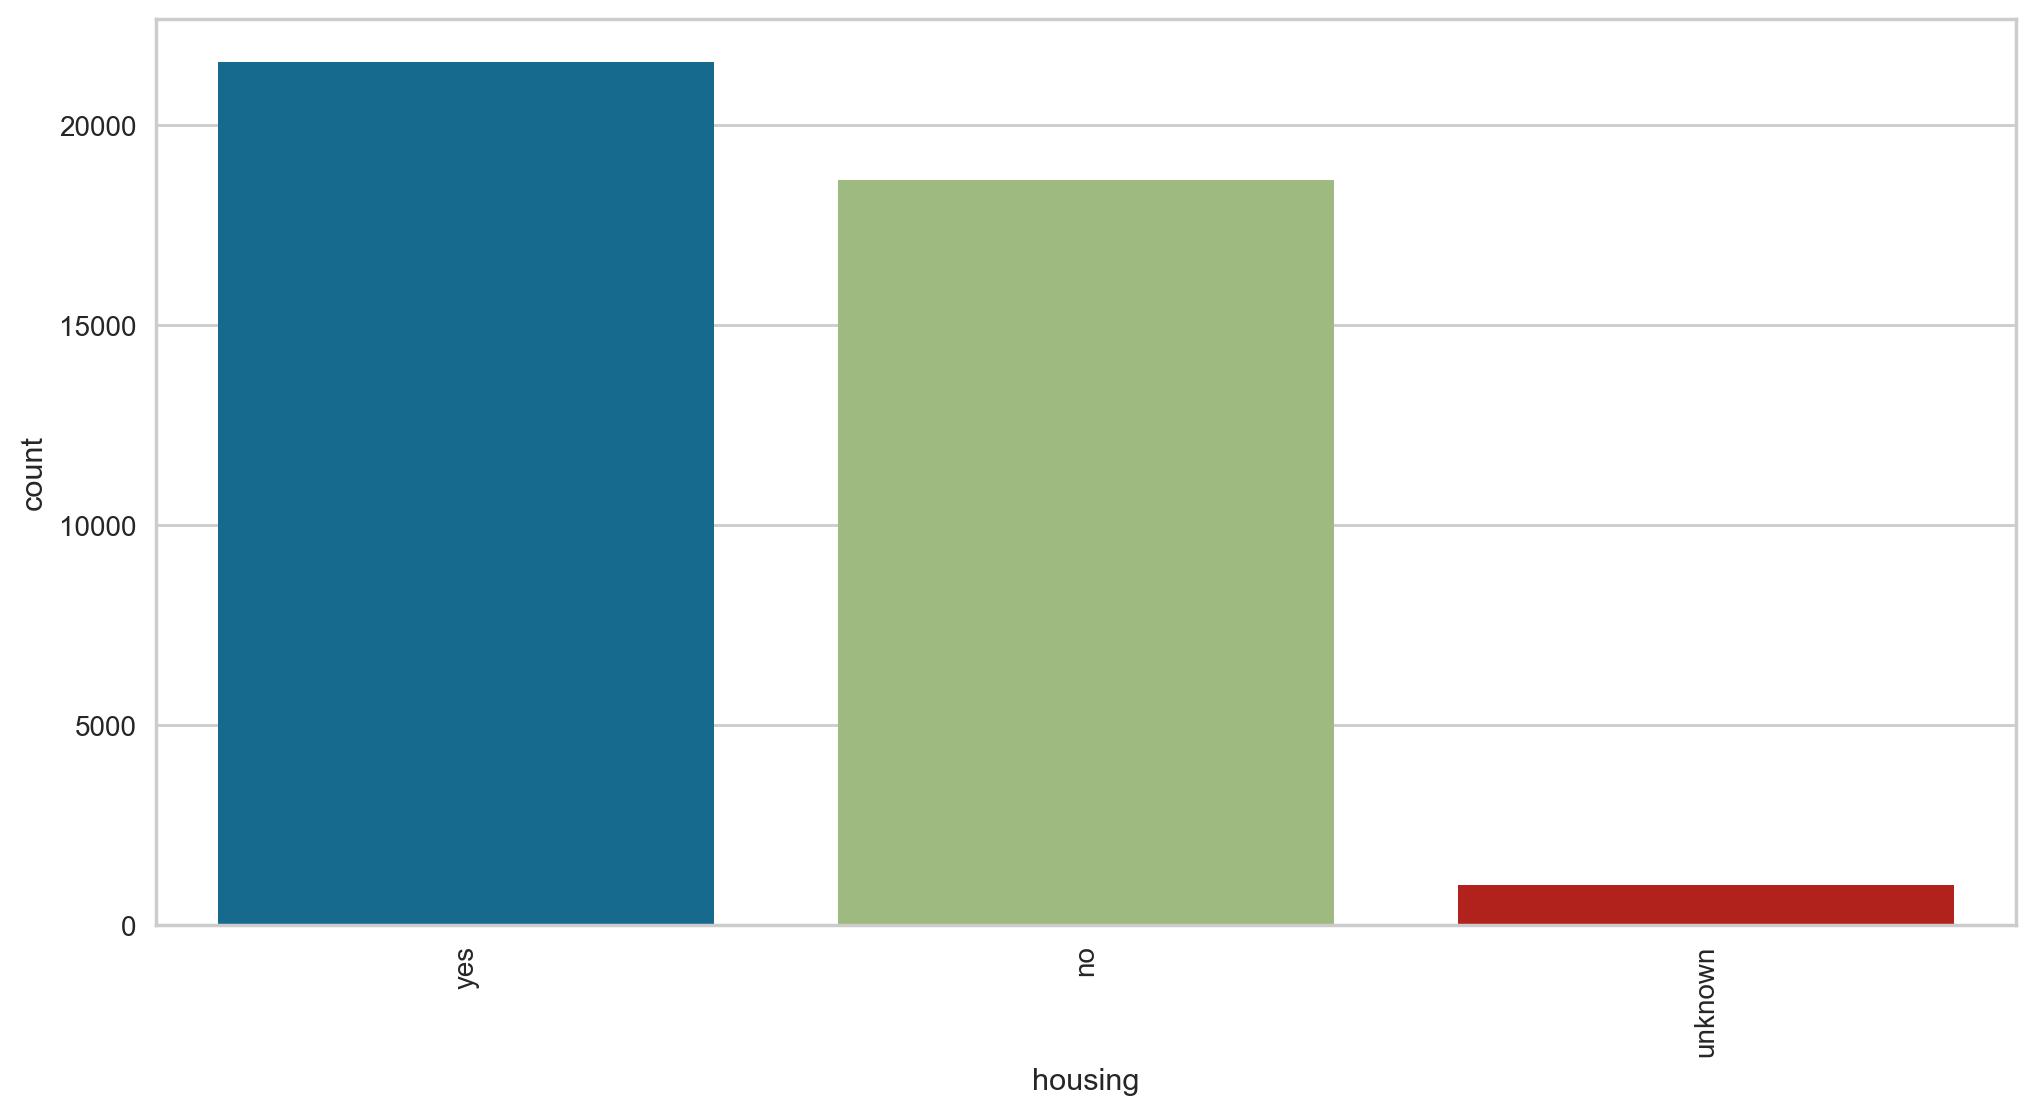

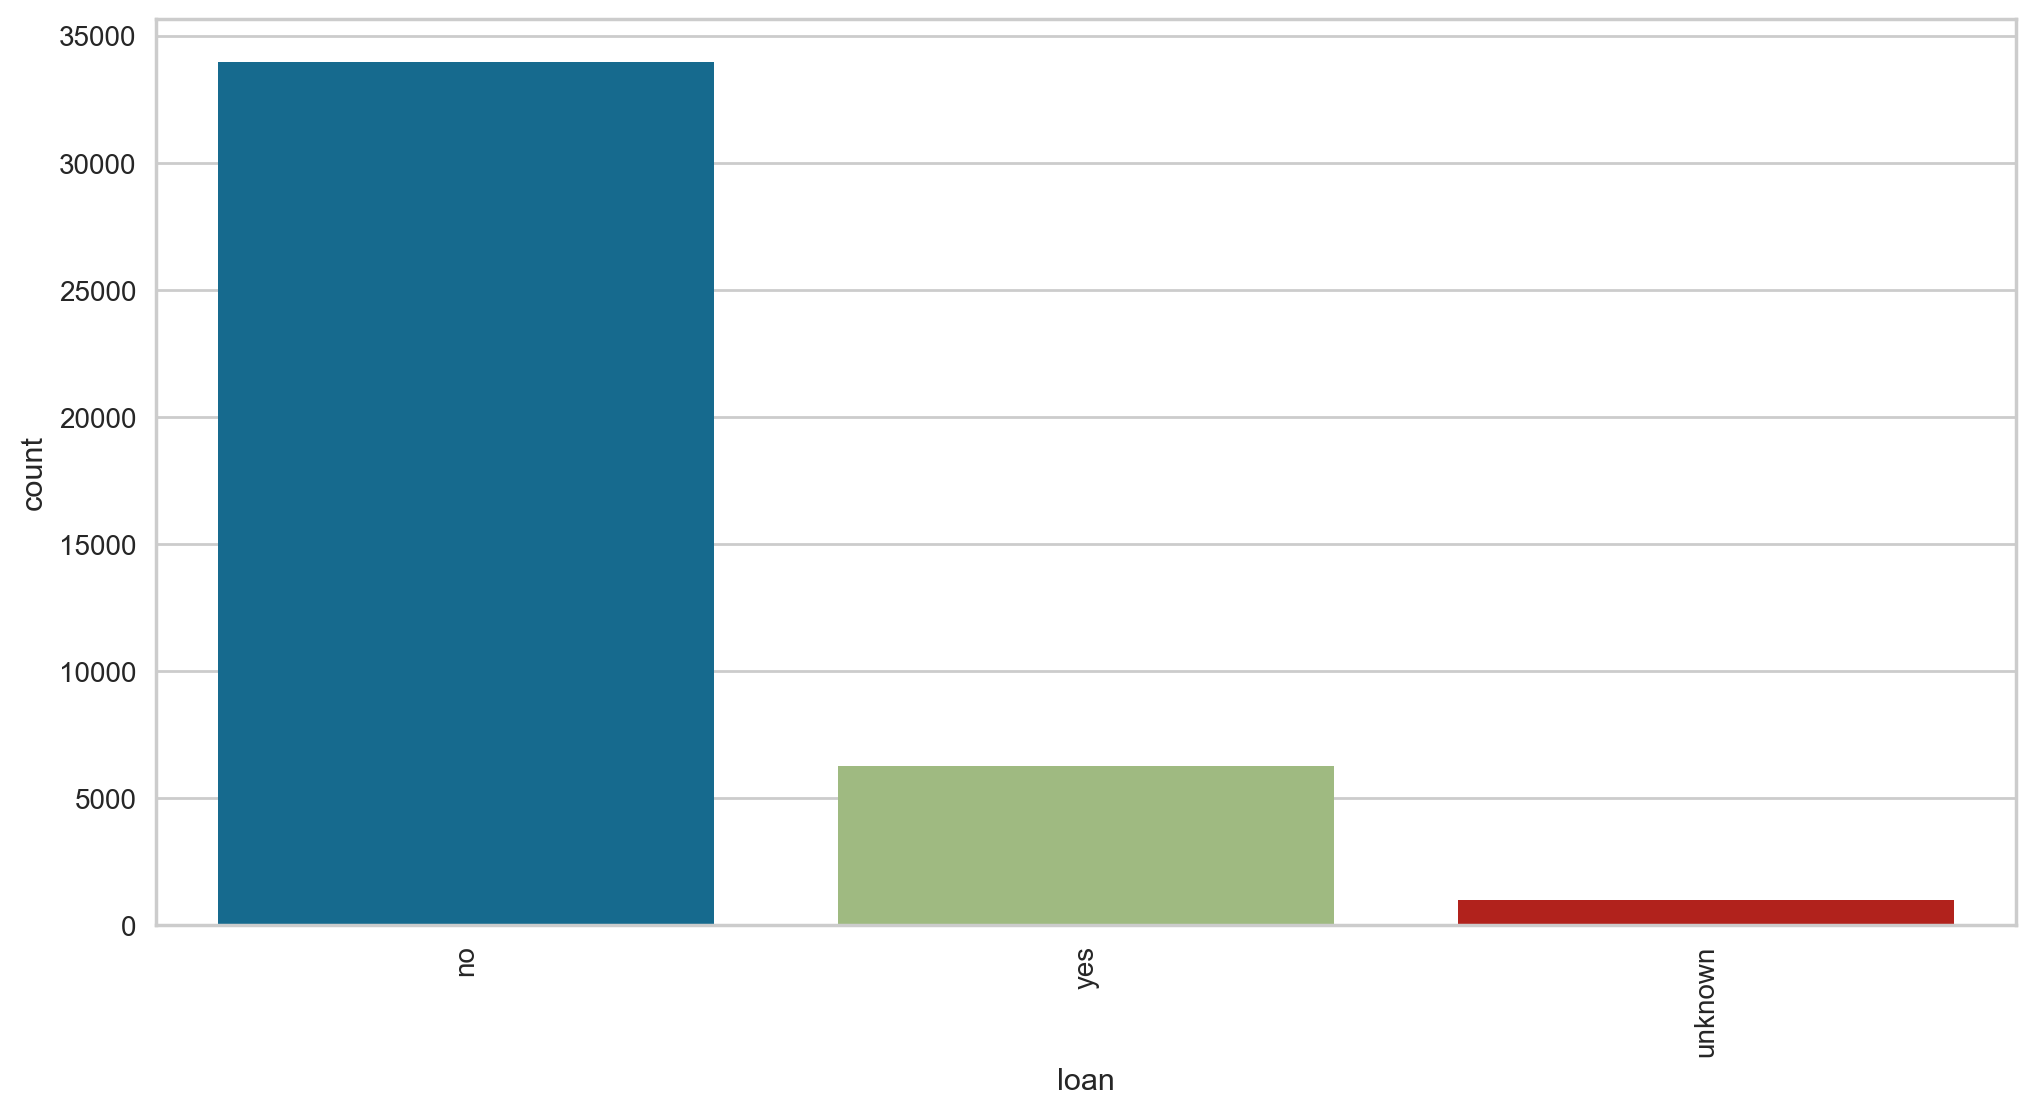

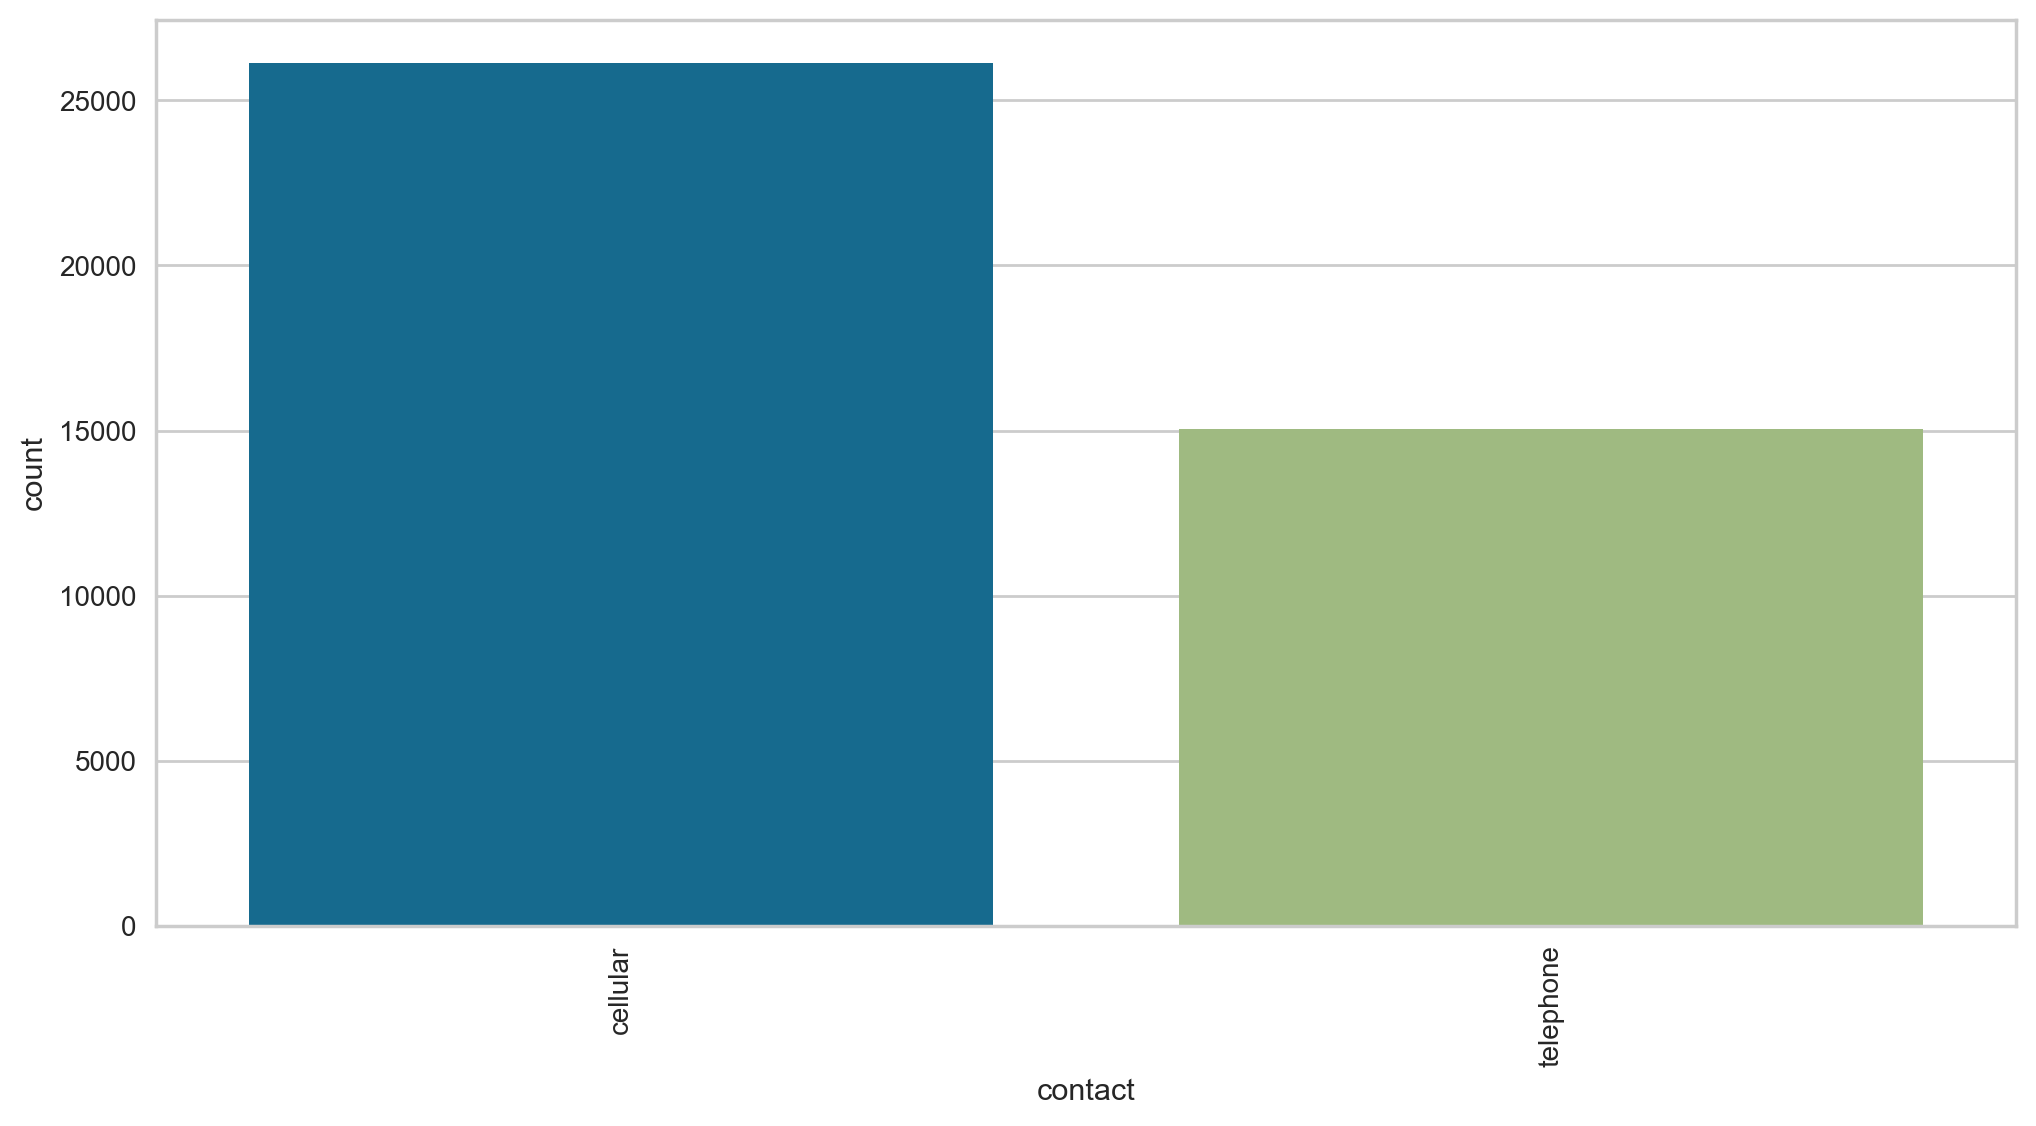

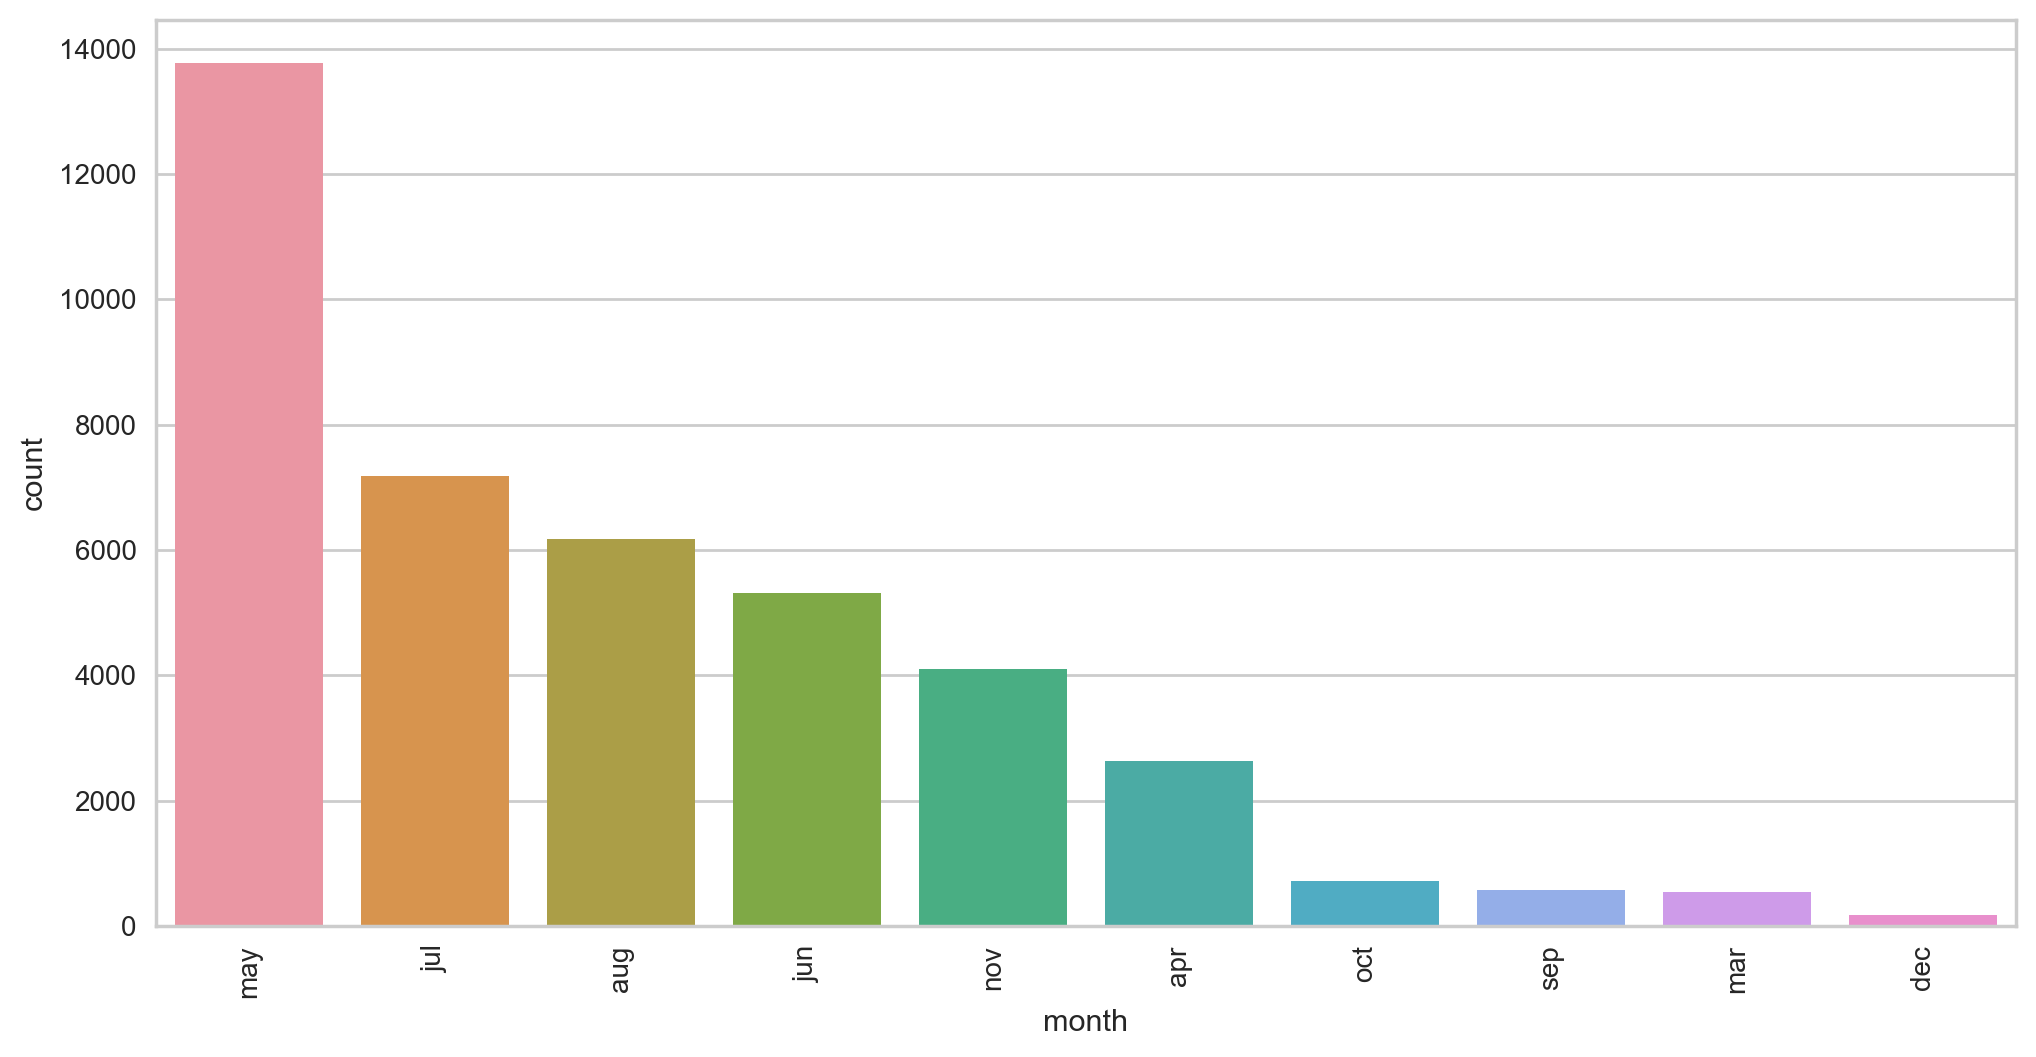

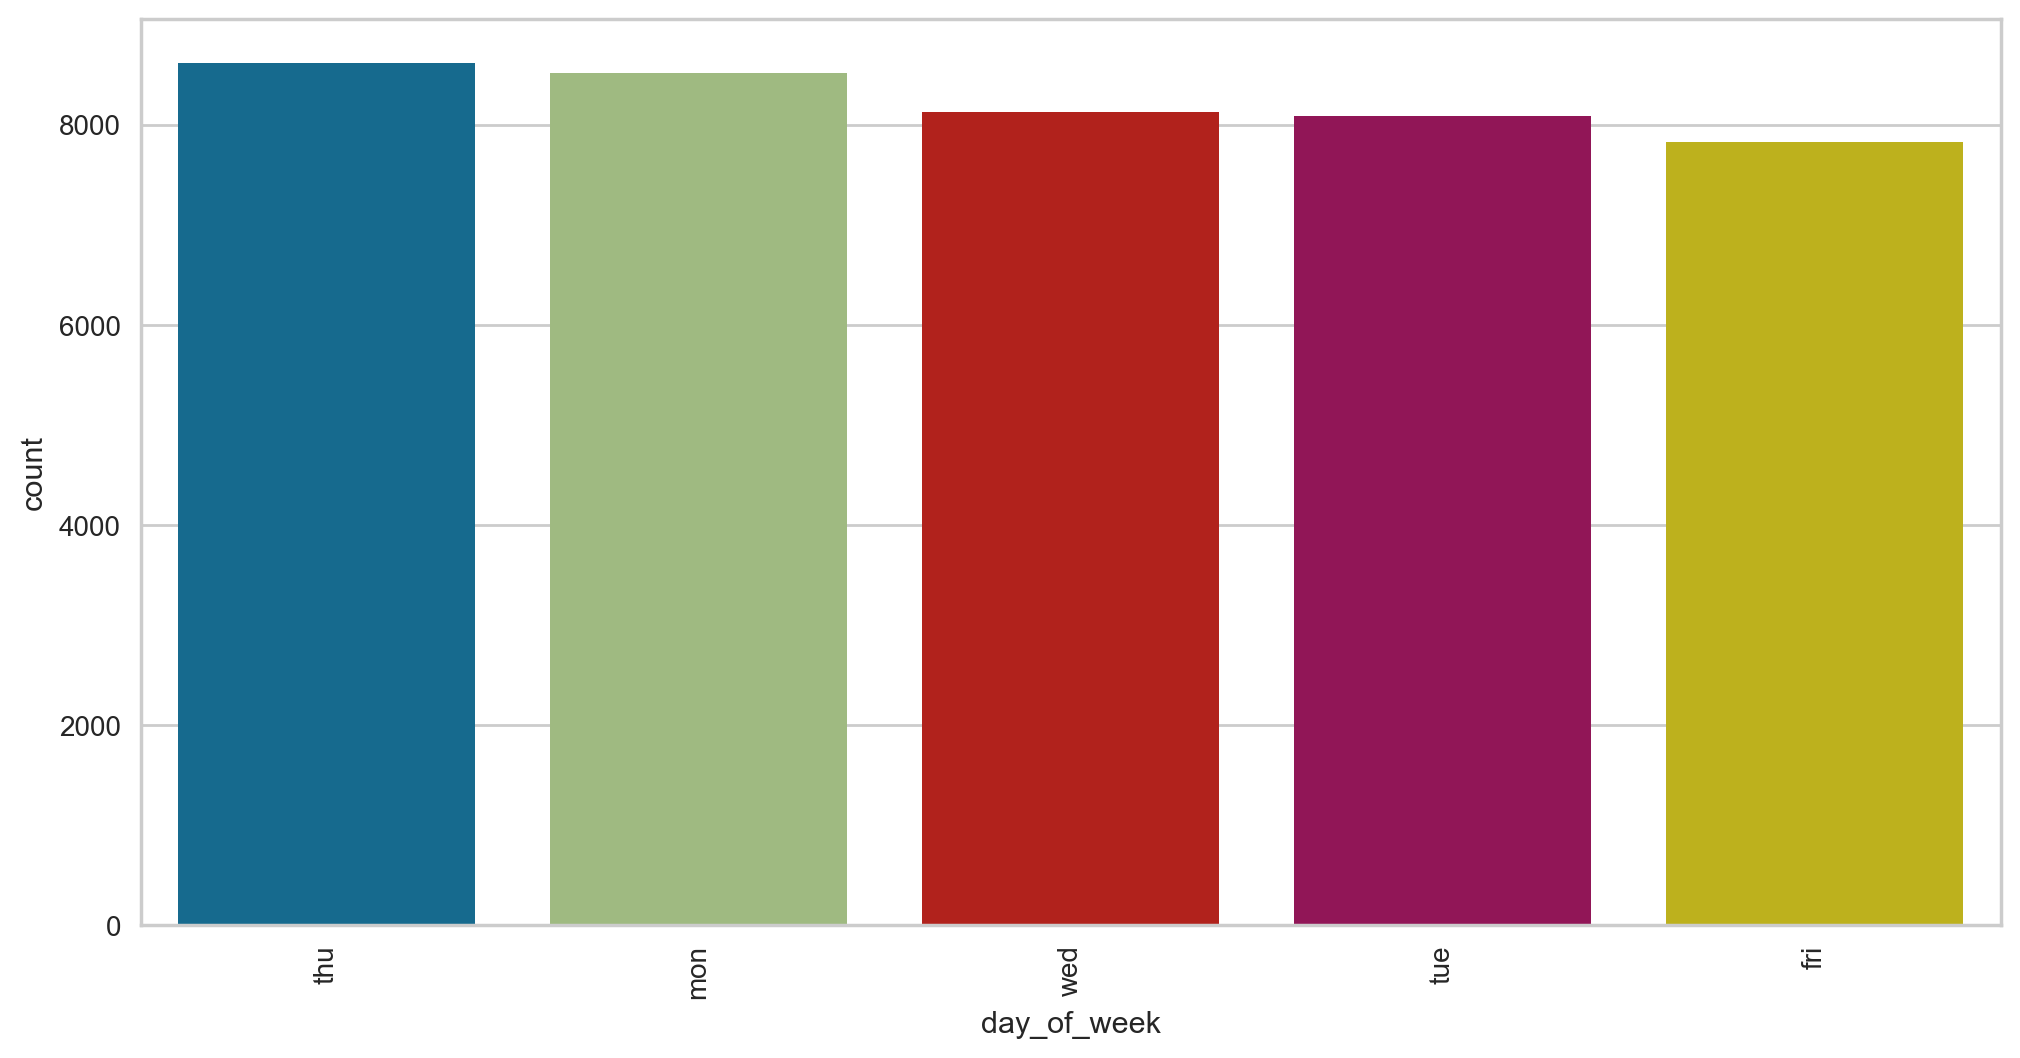

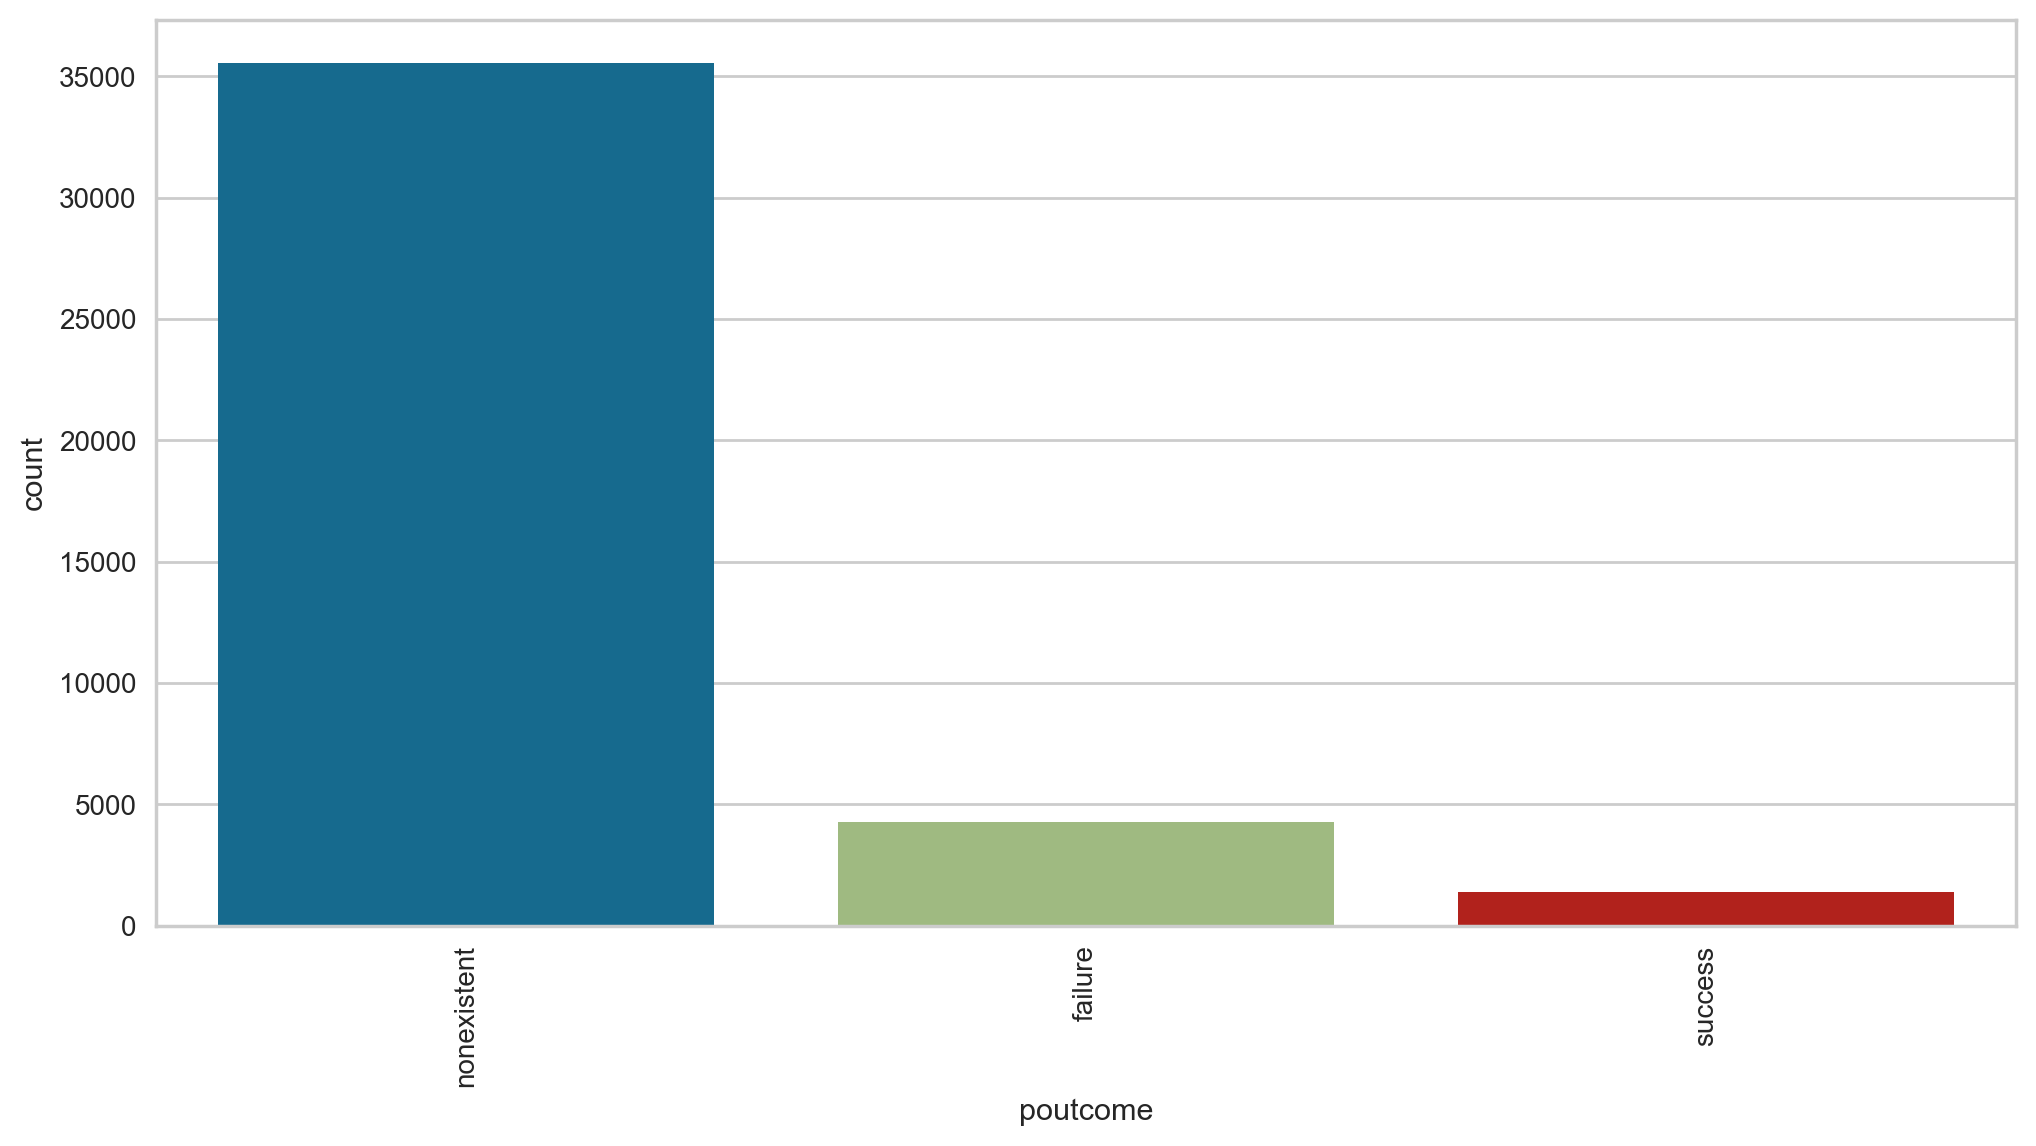

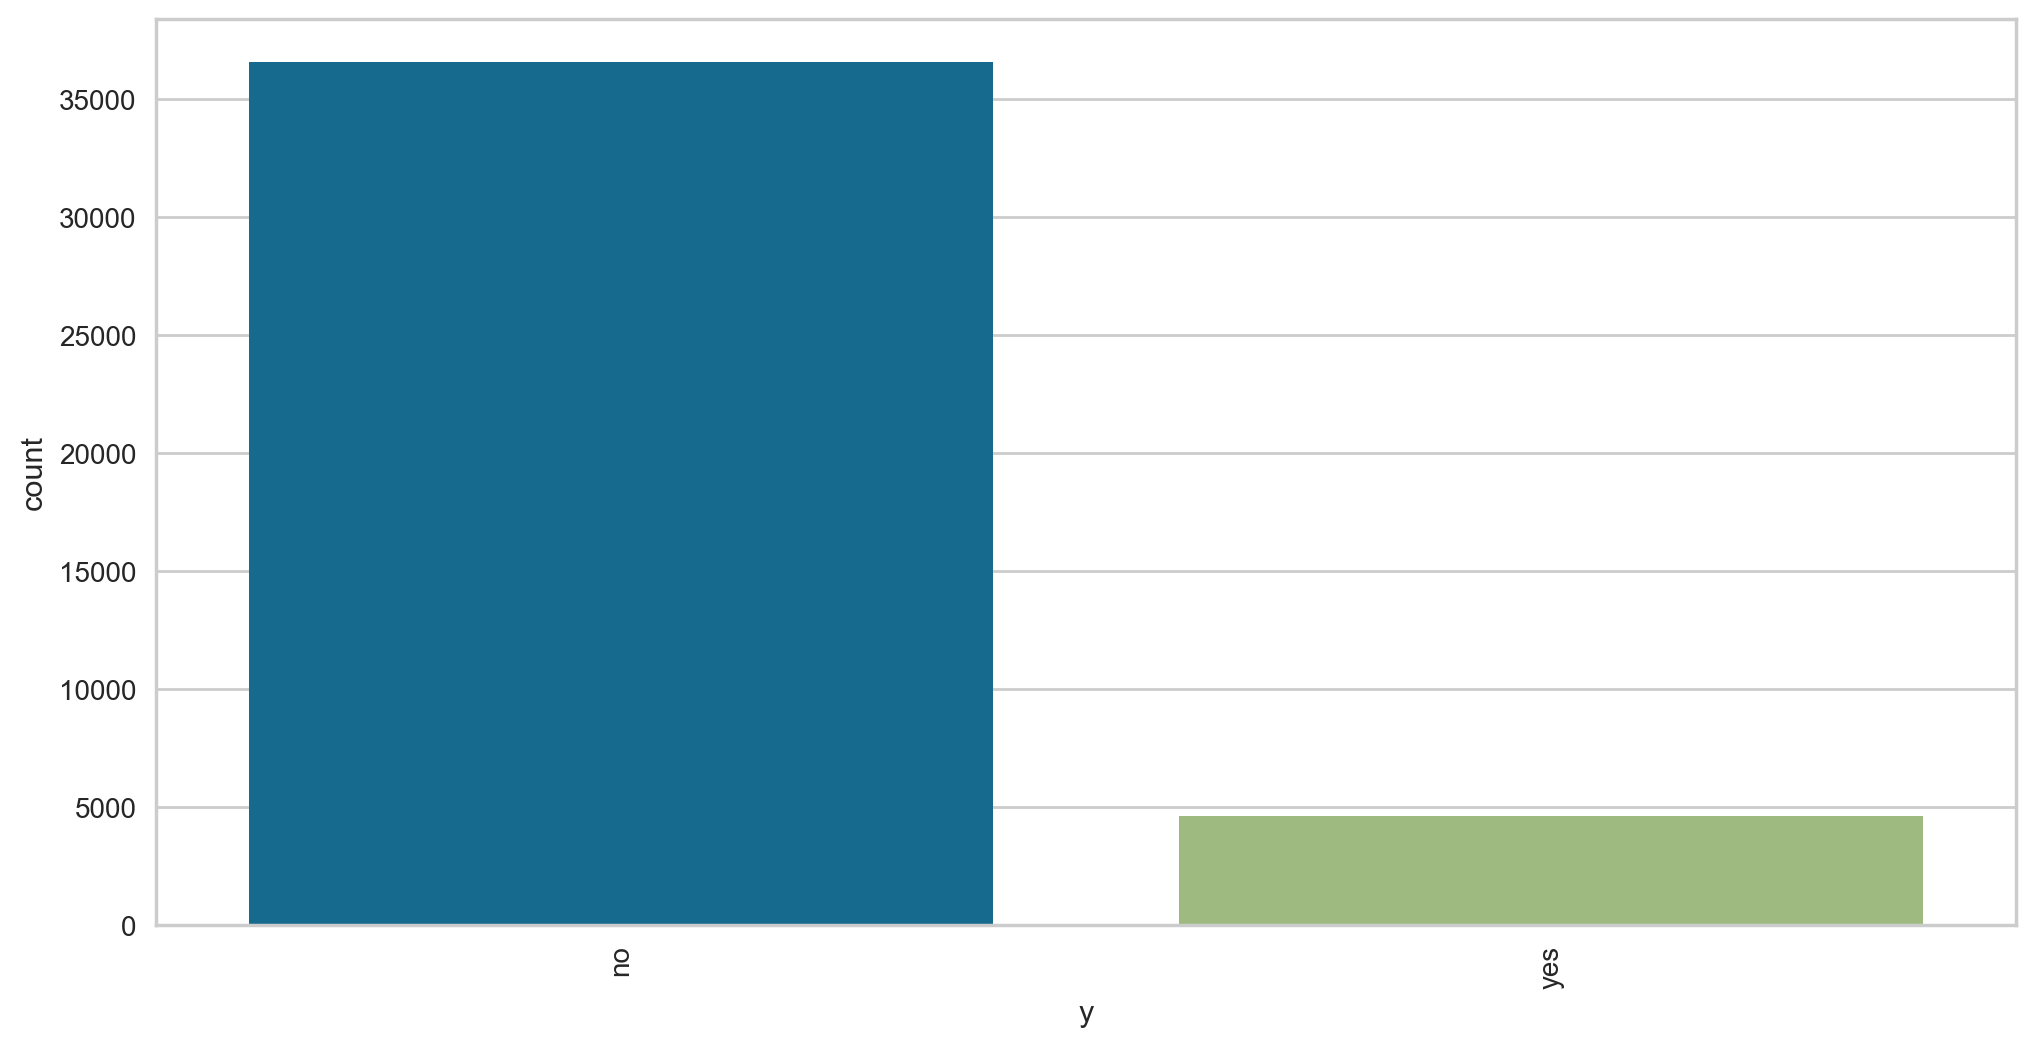

In [16]:
f(catCol)

We visualized categorical column as counter plot. We can see each column one by one and we can have idea about them I will give some short explanation and some comment about them.

# bank client data:
1 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

- As you can see out client have so much different job. Also as you can see we have few client who is unemployed this makes sense becuse client need money for bank marketing. 

2 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

- As you can see our client mostly married. This makes sense because our client is mostly middle age

3 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

- As you can see our client mostly have high education degree.

4 - default: has credit in default? (categorical: "no","yes","unknown")

5 - housing: has housing loan? (categorical: "no","yes","unknown")

- As you can see there is more client who have house than don't have house. 

6 - loan: has personal loan? (categorical: "no","yes","unknown")

- As you can see our client mostly don't have loan this make sense too because client who have loan will not want take risk and bank marketing have high risk.


# related with the last contact of the current campaign:
7 - contact: contact communication type (categorical: "cellular","telephone") 

8 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

9 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
# other attributes:
10 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

11 - y: has the client subscribed a term deposit? (binary: "yes","no")

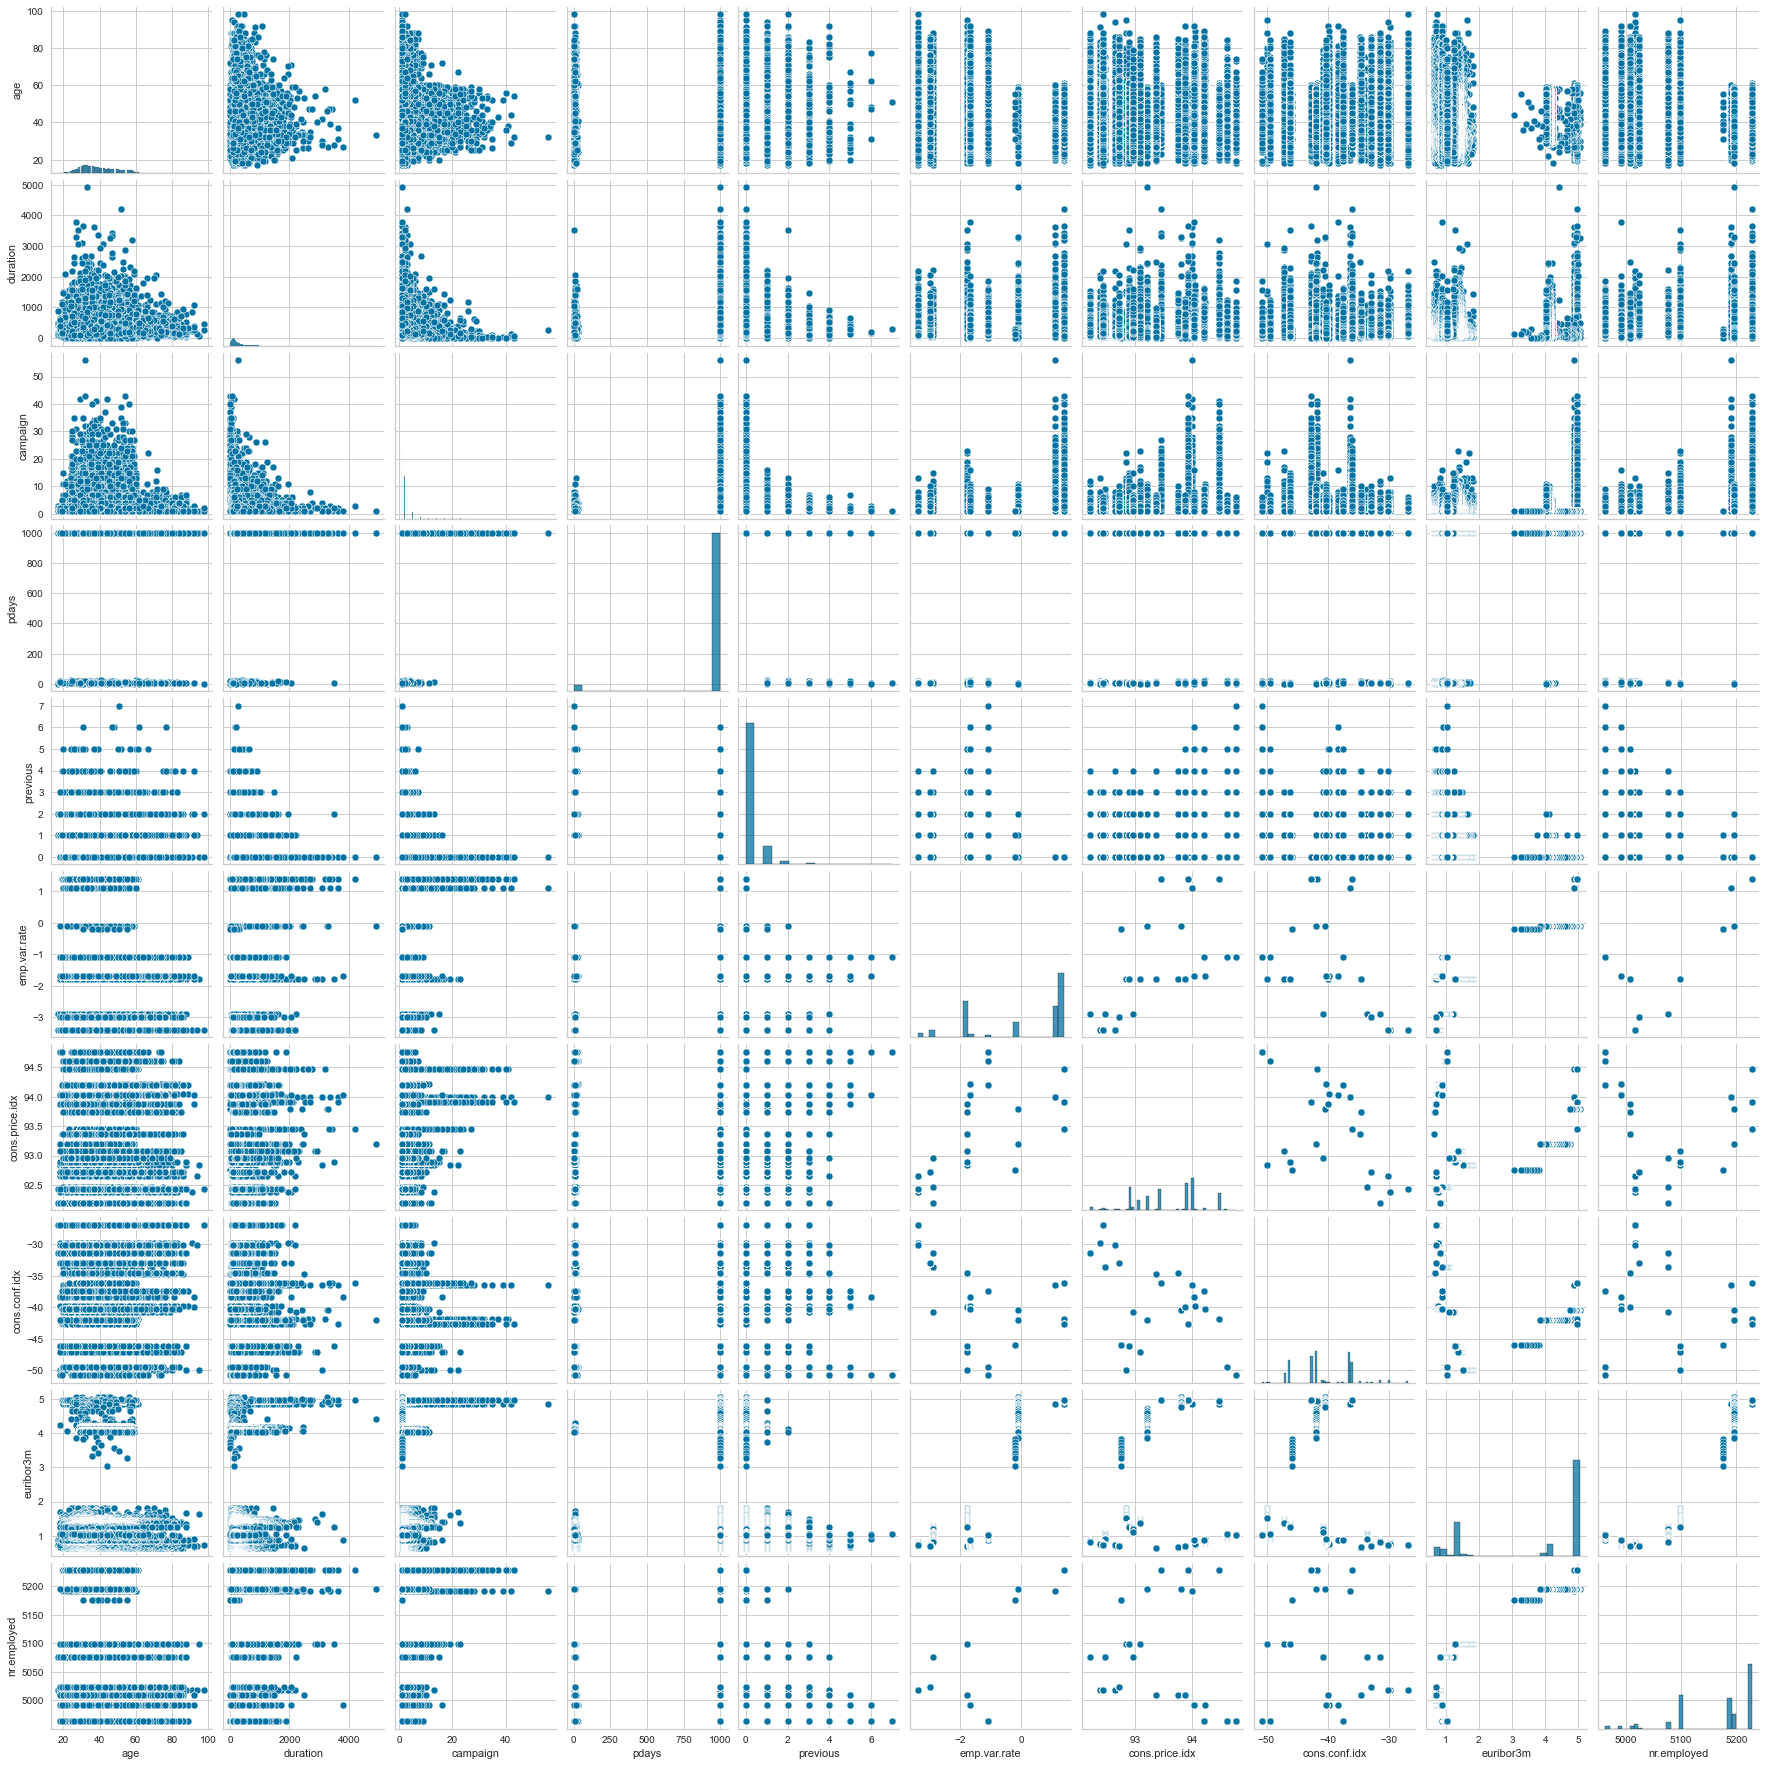

In [17]:
sns.pairplot(df)

# Now data processing and Cleaning

In [18]:
df.shape

(41188, 21)

As you can see we have 41188 client. Since we have huge data set and we don't want high time, I will drop client who have unknown feature.

In [19]:
def g(x):
    for i in x:
        print(f"{i} column has ", df[df[i]  == "unknown"].shape[0], " unknown value")
        df.drop(df.loc[df[i]=="unknown"].index, inplace=True)

In [20]:
catCol = ["job", "marital", "education", "default", "housing", "loan"]
g(catCol)

job column has  330  unknown value
marital column has  71  unknown value
education column has  1596  unknown value
default column has  7964  unknown value
housing column has  739  unknown value
loan column has  0  unknown value


In [21]:
df.shape

(30488, 21)

After cleaning data set from unknown value we have still 30000 client in out data set and this is the best part of our data set initially that means we had't so much missing value and that is good thing.

In [22]:
X = pd.get_dummies(df)

In [23]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


I chosed two different model for my model. First one is unsupervised model which is KMean clustering and second is supervised model which is logistic regression. I chosed them because my data set have mostly categorical feature and these models are more suitable for my dateset's nature.

# KMeans Clustering

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X = scaler.fit_transform(X)

<AxesSubplot:>

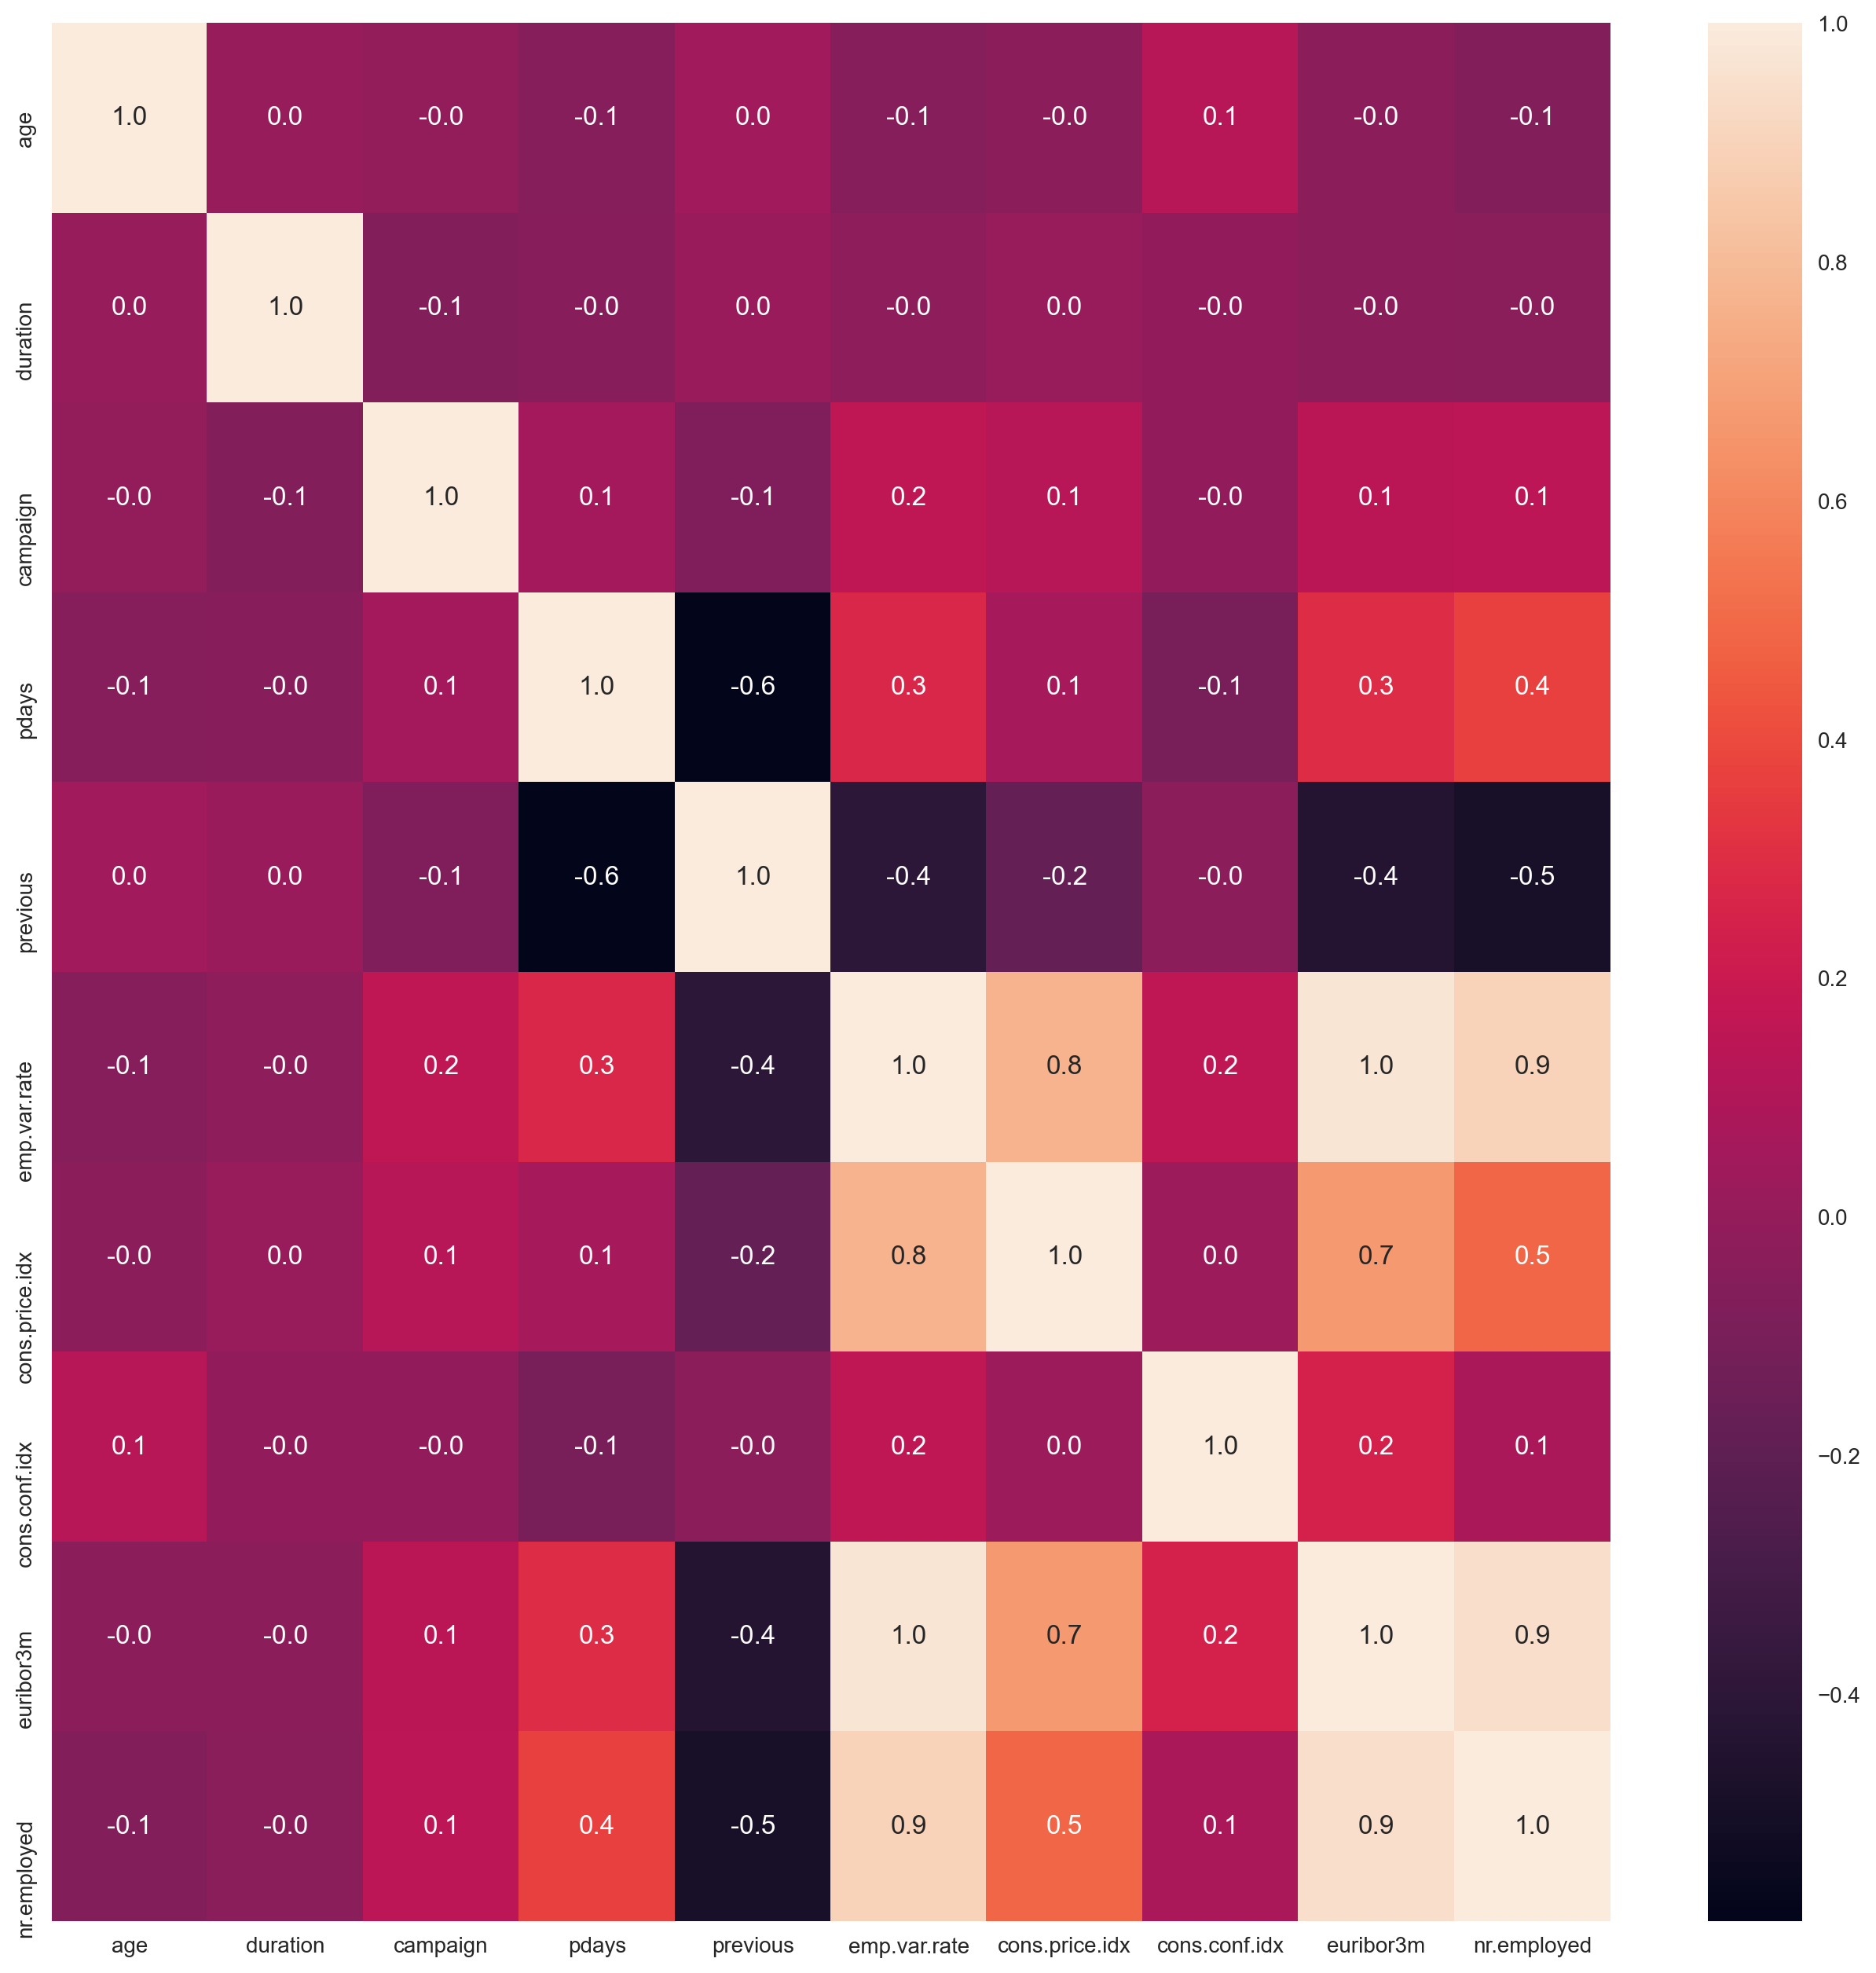

In [27]:
plt.figure(figsize=(16,16), dpi = 200)
sns.heatmap(df.corr(), annot=True, fmt = "0.1f")

This is my dataset's heat map. As you can see in heat map, we have high correlation between employment variation rate and consumer price index, employment variation rate and number of employees, this is that makes sense because when number is increasing variation should increase too, and some feature too. We don't have correlation between client data. This will effect our model bad probably.

In [28]:
silScore = []

for n_clusters in range(2,30):
    model = KMeans (n_clusters=n_clusters)
    preds = model.fit_predict(X)
    centers = model.cluster_centers_

    score = silhouette_score(scaled_X, preds, metric='euclidean')
    silScore.append(score)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.05706273250303696
For n_clusters = 3, silhouette score is 0.059491240172042305
For n_clusters = 4, silhouette score is 0.025411610354174413
For n_clusters = 5, silhouette score is 0.014881438174812548
For n_clusters = 6, silhouette score is 0.012010653427632464
For n_clusters = 7, silhouette score is 0.022437945879958402
For n_clusters = 8, silhouette score is 0.01161371596859389
For n_clusters = 9, silhouette score is 0.0032409191986256755
For n_clusters = 10, silhouette score is -0.007312192074354212
For n_clusters = 11, silhouette score is -0.00831620600474291
For n_clusters = 12, silhouette score is -0.009045134320097388
For n_clusters = 13, silhouette score is -0.009498137207630025
For n_clusters = 14, silhouette score is -0.010449646493489076
For n_clusters = 15, silhouette score is -0.009274989554589016
For n_clusters = 16, silhouette score is -0.00937357524395317
For n_clusters = 17, silhouette score is -0.008119188297785296
For n_clust

We searched best clustering number in here via silhouette score. According to these informations we will have best model with two cluster. This is make sense because our data about bank marketing, client will use bank marketing or not.

Text(0, 0.5, 'silhouette score')

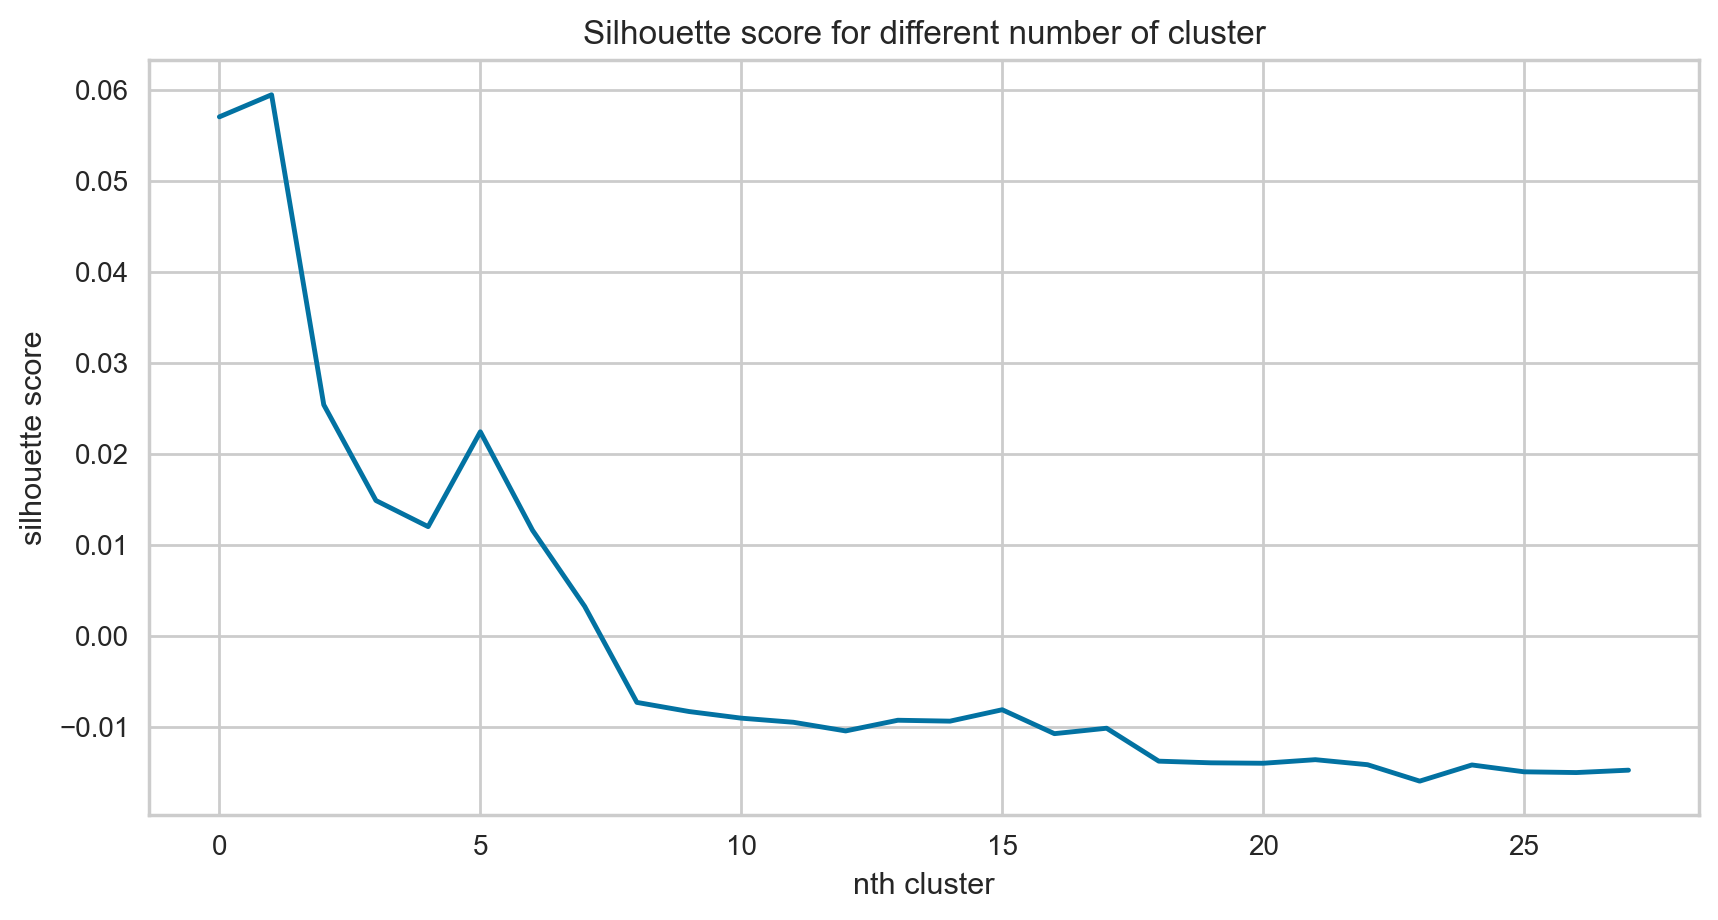

In [29]:
plt.figure(figsize=(10,5), dpi=200)
plt.title('Silhouette score for different number of cluster')
plt.plot(silScore)
plt.xlabel('nth cluster')
plt.ylabel('silhouette score')

This is visualizations of silhouette score. Y axis is silhouette score and x axis is number of cluster in range 2-30

In [30]:
KM = KMeans(n_clusters=2, random_state=42)
cluster_label = KM.fit_predict(scaled_X)

In [31]:
cluster_label

array([1, 1, 1, ..., 0, 0, 0])

In [32]:
X["KMean2Cluster"] = cluster_label

In [33]:
X.corr()['KMean2Cluster'].sort_values()

previous                        -0.465377
poutcome_failure                -0.447080
contact_cellular                -0.395484
month_apr                       -0.343046
y_yes                           -0.295086
poutcome_success                -0.253335
month_sep                       -0.161415
month_mar                       -0.159246
month_oct                       -0.155209
month_may                       -0.147377
job_student                     -0.124727
job_retired                     -0.110233
marital_single                  -0.088674
month_dec                       -0.084755
housing_yes                     -0.061108
day_of_week_mon                 -0.031304
duration                        -0.031258
age                             -0.026059
job_unemployed                  -0.021817
education_basic.4y              -0.018081
education_high.school           -0.012921
education_university.degree     -0.012252
day_of_week_fri                 -0.011094
day_of_week_thu                 -0

Here is the correlation between feature and predicted value as you can see we have high correlation between prediction and some feature.

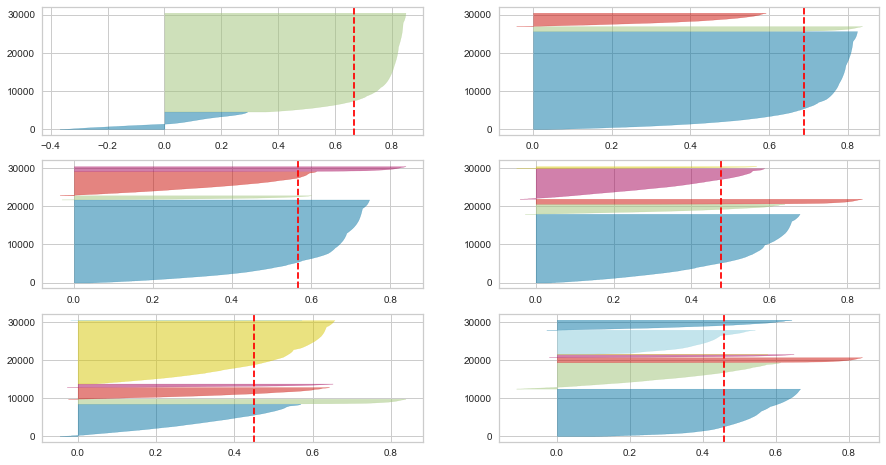

In [34]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in range(2,8):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters. The value of n_clusters as 6 and 7 looks dont well clustered because silhouette scores of them is small and there is Wide fluctuations in the size of the silhouette plots. As you can see some of them have nearly zero area. The value of 2 for n_clusters looks well clustered. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. As I can say in the above this make sense because of nature of dataset

In [35]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Logistic Regression 

In [36]:
X = pd.get_dummies(df.drop(df.columns[-1], axis= 1))
y = df.iloc[:,-1]

our target variable is y which is about yhat has the client subscribed a term deposit?

In [37]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [38]:
y

0         no
2         no
3         no
4         no
6         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 30488, dtype: object

In [39]:
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.642253,0.005792,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,-0.633784,-0.478237,-0.192463,6.571568,-0.286387,-0.203817,-0.192738,-0.321556,-0.142886,-0.467749,-0.157502,-0.363194,0.861956,-0.669855,3.436580,-0.218480,-0.403895,-0.581239,-0.018998,-0.406364,-0.720159,0.00992,-0.00992,1.087593,-1.087593,0.430559,-0.430559,-1.426584,1.426584,-0.273025,-0.425463,-0.071946,-0.447196,-0.366714,-0.126742,1.460286,-0.359889,-0.146664,-0.128467,-0.481289,1.963556,-0.515199,-0.492681,-0.501404,-0.357851,0.424333,-0.201625
1,-0.196452,-0.127944,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,-0.633784,-0.478237,-0.192463,-0.152171,-0.286387,-0.203817,-0.192738,3.109877,-0.142886,-0.467749,-0.157502,-0.363194,0.861956,-0.669855,-0.290987,-0.218480,-0.403895,1.720464,-0.018998,-0.406364,-0.720159,0.00992,-0.00992,-0.919461,0.919461,0.430559,-0.430559,-1.426584,1.426584,-0.273025,-0.425463,-0.071946,-0.447196,-0.366714,-0.126742,1.460286,-0.359889,-0.146664,-0.128467,-0.481289,1.963556,-0.515199,-0.492681,-0.501404,-0.357851,0.424333,-0.201625
2,0.093870,-0.414520,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,1.577824,-0.478237,-0.192463,-0.152171,-0.286387,-0.203817,-0.192738,-0.321556,-0.142886,-0.467749,-0.157502,-0.363194,0.861956,-0.669855,-0.290987,4.577074,-0.403895,-0.581239,-0.018998,-0.406364,-0.720159,0.00992,-0.00992,1.087593,-1.087593,0.430559,-0.430559,-1.426584,1.426584,-0.273025,-0.425463,-0.071946,-0.447196,-0.366714,-0.126742,1.460286,-0.359889,-0.146664,-0.128467,-0.481289,1.963556,-0.515199,-0.492681,-0.501404,-0.357851,0.424333,-0.201625
3,1.642253,0.181559,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,-0.633784,-0.478237,-0.192463,-0.152171,-0.286387,-0.203817,-0.192738,3.109877,-0.142886,-0.467749,-0.157502,-0.363194,0.861956,-0.669855,-0.290987,-0.218480,-0.403895,1.720464,-0.018998,-0.406364,-0.720159,0.00992,-0.00992,1.087593,-1.087593,-2.322562,2.322562,-1.426584,1.426584,-0.273025,-0.425463,-0.071946,-0.447196,-0.366714,-0.126742,1.460286,-0.359889,-0.146664,-0.128467,-0.481289,1.963556,-0.515199,-0.492681,-0.501404,-0.357851,0.424333,-0.201625
4,1.932575,-0.460373,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,1.577824,-0.478237,-0.192463,-0.152171,-0.286387,-0.203817,-0.192738,-0.321556,-0.142886,-0.467749,-0.157502,-0.363194,0.861956,-0.669855,-0.290987,-0.218480,-0.403895,-0.581239,-0.018998,2.460848,-0.720159,0.00992,-0.00992,1.087593,-1.087593,0.430559,-0.430559,-1.426584,1.426584,-0.273025,-0.425463,-0.071946,-0.447196,-0.366714,-0.126742,1.460286,-0.359889,-0.146664,-0.128467,-0.481289,1.963556,-0.515199,-0.492681,-0.501404,-0.357851,0.424333,-0.201625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,3.287410,0.284727,-0.559335,0.211887,-0.371616,-0.638666,2.124640,-2.129332,-1.368408,-2.624025,-0.633784,-0.478237,-0.192463,-0.152171,-0.286387,4.906360,-0.192738,-0.321556,-0.142886,-0.467749,-0.1

In [40]:
train_ratio = 0.70
test_ratio = 0.10
validation_ratio = 0.20


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_ratio, shuffle=True, random_state=5)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+validation_ratio), shuffle=True, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(21341, 57)
(3049, 57)
(6098, 57)


I splited our dataset with 80-20 ratio.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_valid,y_valid)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_valid,y_valid)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}


I did parameter selection for logistic regression using grid search and for this i used the validation set. I used the validation set because I want to avoid overfitting. As you can see our model is giving best accurracy with 1000 C values and l2 which is ridge norm as the norm used in normalization.

In [43]:
scaler = StandardScaler()

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
log_model = LogisticRegressionCV()

In [46]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

We will do parameter selection for logistic regression.

In [47]:
log_model.C_

array([2.7825594])

Our model have best performance when C value is 2.78

In [48]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

Here is the parameters of our model.

In [49]:
log_model.coef_

array([[-4.50838082e-02,  1.21300658e+00, -9.78287647e-02,
        -1.72489544e-01, -9.72526900e-03, -2.95603827e+00,
         1.39431406e+00,  1.07147161e-01,  5.19735792e-01,
         5.41553192e-01,  1.70916842e-02, -7.02060415e-02,
        -3.70872640e-02,  5.69171497e-03,  8.21055530e-03,
         7.60809318e-02, -6.26151899e-03, -2.20458835e-02,
         4.59204329e-02,  2.30630053e-02,  6.93646362e-03,
        -4.95349741e-03, -5.24389534e-03,  9.02863971e-03,
        -2.70207191e-02, -2.72500795e-03, -5.11926672e-02,
         4.06796659e-03,  3.62256951e-02,  5.32868387e-04,
         4.81522336e-02,  3.28021700e-02, -3.28021700e-02,
        -2.91224123e-03,  2.91224123e-03,  1.94111517e-03,
        -1.94111517e-03,  1.79865941e-01, -1.79865941e-01,
         1.77660755e-02,  3.12720045e-01,  4.46497264e-03,
         1.27706895e-02, -1.83428456e-01,  2.49321652e-01,
        -1.52586737e-01, -1.12971301e-01,  3.74917968e-02,
         6.35096512e-02, -4.82955221e-02, -5.83985238e-0

These are beta value of our model.

# Model Evaluation and Visualizations

In [50]:
y_pred = log_model.predict(scaled_X_test)

In [51]:
confusion_matrix(y_test, y_pred)

array([[2574,   96],
       [ 204,  175]], dtype=int64)

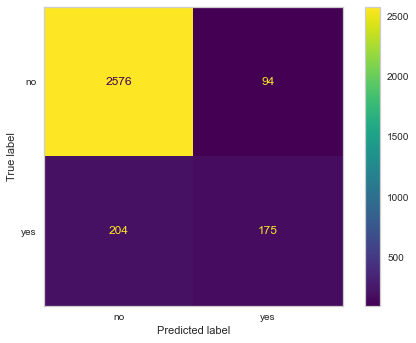

In [52]:
plot_confusion_matrix(log_model, X_test, y_test)
plt.grid(False)
plt.show()

In [53]:
print("Accuracy score is: ", accuracy_score(y_test, y_pred))

Accuracy score is:  0.9016070842899311


In [54]:
print("recall score is: ",recall_score(y_test, y_pred, pos_label="yes"))

recall score is:  0.46174142480211083


In [55]:
print("precision score is: ",precision_score(y_test, y_pred, pos_label="yes"))

precision score is:  0.6457564575645757


Accuracy = (175+2576)/3049 = 0.9022630371

Error rate = (204+94)/ 3049 = =0.097

Precision = 175/(175+94) = 0.65

Recall = 175/(175+204) = 0.46

- As you can see we predicated negative truth value good enough. We predicated negative truth value quite good but there is small error. Our confusion matrix have small precision value. This isn't good. This may be due to our dataset's client information feature don't have a correlation.

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.96      0.94      2670
         yes       0.65      0.46      0.54       379

    accuracy                           0.90      3049
   macro avg       0.79      0.71      0.74      3049
weighted avg       0.89      0.90      0.89      3049



Here is the classification report of model. We have good performance on negative truth value but I can't say same think for positive truth value.

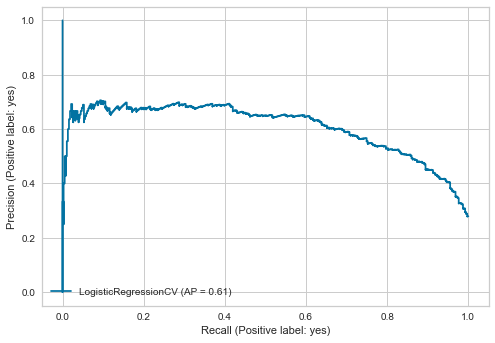

In [57]:
plot_precision_recall_curve(log_model, X_test, y_test)

As you can see our model's precision recall curve like pretty good classifier. İt is not so much good but as i search it is like good enough. Also, you can look area under the curve for performance. High area means good model and small area means bad model.Our model has quite high area.

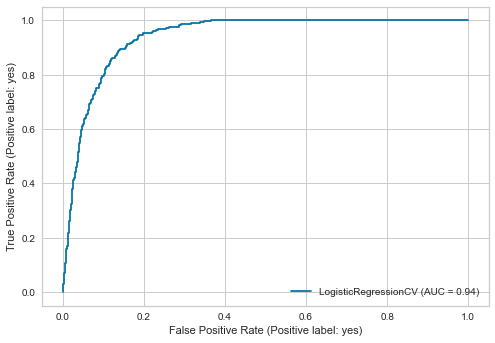

In [58]:
plot_roc_curve(log_model, X_test, y_test)

As you can see in the ROC curve our model have quite good performance. Area under under curve(AUC) is 0.93 and this is nearly max value which is 1. Our model have better performance on ROC curve than PR curve.